# Segmentez des clients d'un site e-commerce - 2

- [Base de données RFM + Avis](#Base-de-données-RFM-+-Avis)
- [K-Means](#K-Means)
  * RFM :
     * [RFM - Silhouette](#RFM---Silhouette)
     * [RFM - Calinski-harabasz](#RFM---Calinski-harabasz)
     * [RFM - Inertie/Distortion](#RFM---Inertie/Distortion)
     * [RFM - Analyse multivariées - Boxplots](#RFM---Analyse-multivariées---Boxplots)
  * RFM + Avis :
     * [RFM+Avis - Silhouette](#RFM+Avis---Silhouette)
     * [RFM+Avis - Calinski harabasz](#RFM+Avis---Calinski-harabasz)
     * [RFM+Avis Inertie/Distortion](#RFM+Avis-Inertie/Distortion)
     * [RFM+Avis - Analyse multivariées - Boxplots](#RFM+Avis---Analyse-multivariées---Boxplots)
  * [Visualisation 2D des clusters](#Visualisation-2D-des-clusters)
- [DBSCAN](#DBSCAN)
     * [Tuning des hyper-paramètres](#Tuning-des-hyper-paramètres)
     * [Visualisation 2D des clusters formés par DBSCAN](#Visualisation-2D-des-clusters-formés-par-DBSCAN)
     * [Nombre de clients dans les clusters](#Nombre-de-clients-dans-les-clusters)
     * [Evaluation du bruit](#Evaluation-du-bruit)
- [Clustering hiérarchique agglomératif](#Clustering-hiérarchique-agglomératif)
     * [Visualisation 2D des clusters formés par les algorithmes hiérarchiques](#Visualisation-2D-des-clusters-formés-par-les-algorithmes-hiérarchiques)
     * [Nombre de clients dans les clusters avec Ward et de Complete linkage](#Nombre-de-clients-dans-les-clusters-avec-Ward-et-de-Complete-linkage)

In [1]:
 pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline  

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
from sklearn import manifold
from sklearn import decomposition
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn import model_selection
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import make_scorer
from sklearn.metrics import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv("table_seg",index_col=0)

### Base de données RFM + Avis 

In [4]:
df.head(5)

customer_unique_id  valeur_totale_achats  \
0  8d50f5eadf50201ccdcedfb9e2ac8455                659.72   
1  3e43e6105506432c953e165fb2acf44c                657.25   
2  ca77025e7201e3b30c44b472ff346268                666.66   
3  1b6c7548a2a1f9037c1fd3ddfed95f33                621.22   
4  6469f99c1f9dfae7733b25662e7f1782                614.40   

   nombre_total_achats  dernier_achat_jours  score_moyen_avis  
0                   15                 1230               5.0  
1                    9                 1404               3.0  
2                    7                 1309               5.0  
3                    7                 1416               5.0  
4                    7                 1283               5.0

* Je vais procéder à la méthode RFM qui est une méthode de segmentation principalement développée à l'origine pour les actions de marketing et qui s'applique également aux acteurs du e-commerce et du commerce traditionnel.

  Le classement RFM se fait en fonction de 3 critères :

  - **Récence** : date du dernier achat ou dernier contact client
  
  - **Fréquence** : fréquence des achats sur une période de référence donnée
  
  - **Montant** : somme des achats cumulés sur cette période

In [5]:
X_RFM_avis = df[["valeur_totale_achats","nombre_total_achats","dernier_achat_jours","score_moyen_avis"]]
X_RFM_avis = X_RFM_avis.rename(columns={"valeur_totale_achats":"Montant","dernier_achat_jours":"Récence","nombre_total_achats":"Fréquence","score_moyen_avis":"Avis"})
X_RFM = X_RFM_avis[["Montant","Fréquence","Récence"]]

In [6]:
std = preprocessing.StandardScaler().fit(X_RFM)
X_scaled_RFM = std.transform(X_RFM)
X_scaled_RFM = pd.DataFrame((X_scaled_RFM), columns=["Montant","Fréquence","Récence"])

# K-Means

* L'algorithme KMeans regroupe les données en essayant de séparer les échantillons en n groupes de variance égale, en minimisant le critère ***inertie*** ou somme des carrés intra-cluster (somme des carrés des distances interclusters des observations de leurs centroïdes). Cet algorithme nécessite que le nombre de clusters k soit spécifié.

* Le coefficient de silhouette est calculé à l'aide de (a) la distance moyenne intra-cluster qui correspond à la distance moyenne entre un échantillon et tous les autres points du même cluster et à l'aide de (b) qui correspond à la distance moyenne entre un échantillon et tous les autres points du cluster le plus proche. Le coefficient de silhouette pour un échantillon est (b - a) / max(a, b).

* Le score est plus élevé lorsque les clusters sont denses et bien séparés

### RFM - Silhouette 

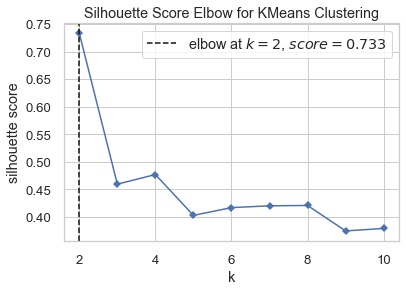

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [410]:
model_RFM = cluster.KMeans()
visualizer1 = KElbowVisualizer(model_RFM, k=(2,11), metric='silhouette', timings=False)
visualizer1.fit(X_RFM)   
visualizer1.show()

* Le score de Calinski et Harabasz est défini comme le ratio entre la dispersion intra-cluster et la dispersion inter-cluster.

* Le score est plus élevé lorsque les clusters sont denses et bien séparés. Un bon modèle est un modèle avec un  score élevé ET un faible nombre de clusters (k)

### RFM - Calinski harabasz

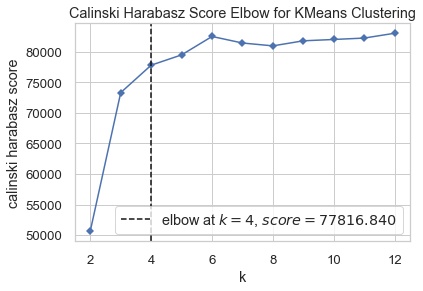

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [411]:
visualizer2 = KElbowVisualizer(model_RFM, k=(2,13), metric='calinski_harabasz', timings=False)
visualizer2.fit(X_RFM)   
visualizer2.show()

* Le score de distortion ou inertie correspond à la somme des carrés des distances interclusters des observations de leurs centroïdes.

* Un bon modèle est un modèle avec un faible score inertie ET un faible nombre de clusters (k). Pour trouver le k optimal pour un jeu de données on utilise la méthode Elbow pour trouver le point où la décroissance de l'inertie commence à ralentir. K=5 est le "coude" de le graphique ci-dessous.

### RFM - Inertie/Distortion

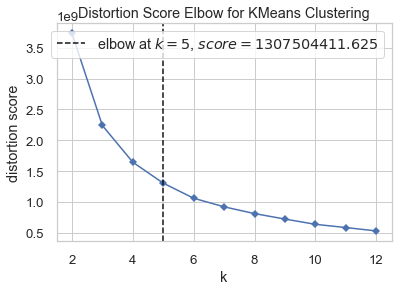

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [412]:
visualizer3 = KElbowVisualizer(model_RFM, k=(2,13), metric='distortion', timings=False)
visualizer3.fit(X_RFM)   
visualizer3.show()

- **Les scores des métriques suggèrent un k compris entre 2 et 5**

### RFM - Analyse multivariées - Boxplots

Je vais présenter maintenant la distribution des variables RFM à laide des boxplots pour chaque k, pour cela je vais rajouter des colonnes contenants les labels de chaque clustering k :

In [314]:
myclust_RFM_2= cluster.KMeans(n_clusters=2)
myclust_RFM_2.fit(X_RFM) 
X_RFM["labels_c2"] = myclust_RFM_2.labels_

myclust_RFM_3= cluster.KMeans(n_clusters=3)
myclust_RFM_3.fit(X_RFM)
X_RFM["labels_c3"] = myclust_RFM_3.labels_

myclust_RFM_4= cluster.KMeans(n_clusters=4)
myclust_RFM_4.fit(X_RFM)
X_RFM["labels_c4"] = myclust_RFM_4.labels_

myclust_RFM_5= cluster.KMeans(n_clusters=5)
myclust_RFM_5.fit(X_RFM)
X_RFM["labels_c5"] = myclust_RFM_5.labels_

myclust_RFM_6= cluster.KMeans(n_clusters=6)
myclust_RFM_6.fit(X_RFM)
X_RFM["labels_c6"] = myclust_RFM_6.labels_

In [389]:
X_RFM_2c = X_RFM[["Montant","Fréquence","Récence","labels_c2"]]
dfm_2 = X_RFM_2c.melt('labels_c2', var_name='cols', value_name='vals')

X_RFM_3c = X_RFM[["Montant","Fréquence","Récence","labels_c3"]]
dfm_3 = X_RFM_3c.melt('labels_c3', var_name='cols', value_name='vals')

X_RFM_4c = X_RFM[["Montant","Fréquence","Récence","labels_c4"]]
dfm_4 = X_RFM_4c.melt('labels_c4', var_name='cols', value_name='vals')

X_RFM_5c = X_RFM[["Montant","Fréquence","Récence","labels_c5"]]
dfm_5 = X_RFM_5c.melt('labels_c5', var_name='cols', value_name='vals')

X_RFM_6c = X_RFM[["Montant","Fréquence","Récence","labels_c6"]]
dfm_6 = X_RFM_6c.melt('labels_c6', var_name='cols', value_name='vals')

[Text(0.5, 1.0, 'Distribution des valeurs des variables RFM sur 6 clusters')]

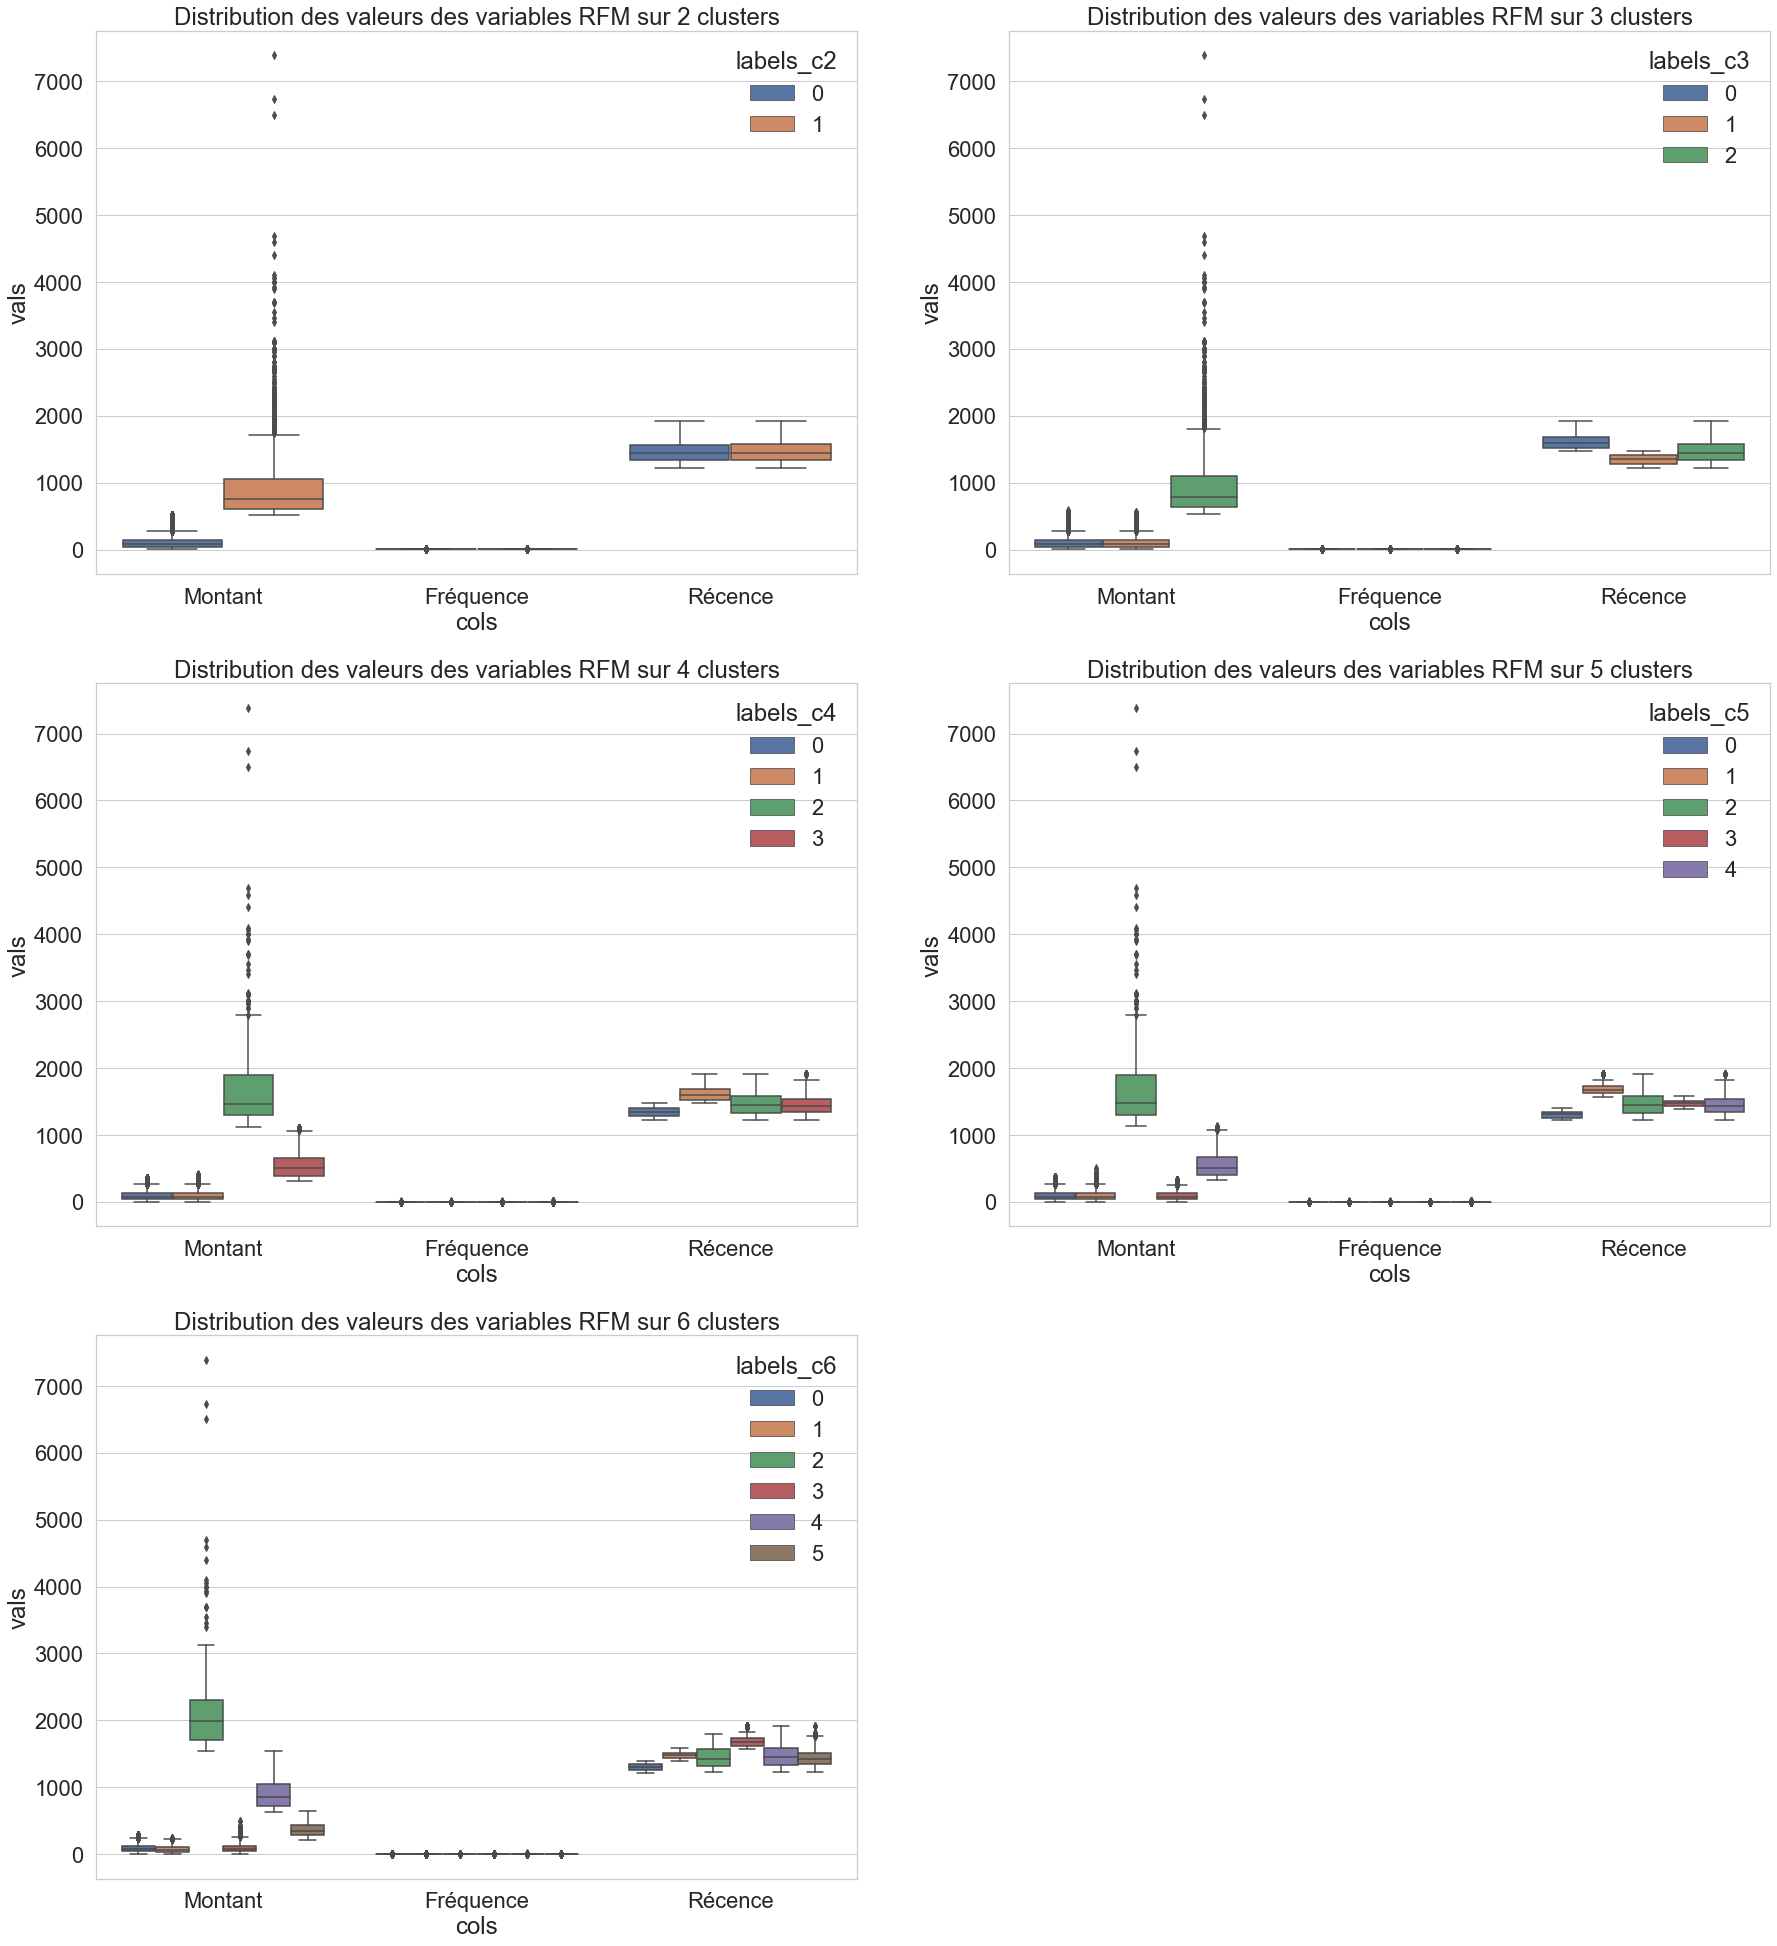

In [382]:
plt.figure(figsize=(30,34))
sns.set(font_scale = 2)
sns.set_style("whitegrid")

ax1 = plt.subplot(3,2,1)
sns.boxplot(x="cols", y="vals",hue="labels_c2",data=dfm_2, ax=ax1).set(title="Distribution des valeurs des variables RFM sur 2 clusters")

ax2 = plt.subplot(3,2,2)
sns.boxplot(x="cols", y="vals",hue="labels_c3",data=dfm_3, ax=ax2).set(title="Distribution des valeurs des variables RFM sur 3 clusters")

ax3 = plt.subplot(3,2,3)
sns.boxplot(x="cols", y="vals",hue="labels_c4",data=dfm_4, ax=ax3).set(title="Distribution des valeurs des variables RFM sur 4 clusters")

ax4 = plt.subplot(3,2,4)
sns.boxplot(x="cols", y="vals",hue="labels_c5",data=dfm_5, ax=ax4).set(title="Distribution des valeurs des variables RFM sur 5 clusters")

ax5 = plt.subplot(3,2,5)
sns.boxplot(x="cols", y="vals",hue="labels_c6",data=dfm_6, ax=ax5).set(title="Distribution des valeurs des variables RFM sur 6 clusters")

Je vais présenter maintenant la distribution des clients dans chaque cluster pour chaque variable RFM à l'aide des boxplots : 

In [457]:
def box_plot(labels):
    '''Takes one parameter. Return box plot'''
    plt.figure(figsize=(16,14))
    sns.set(font_scale = 1.2)
    sns.set_style("whitegrid")
    
    ax1 = plt.subplot(2, 2, 1) 
    sns.boxplot(x=labels, y="Montant",data=X_RFM,ax=ax1).set(title="Distribution des valeurs de la variable Montant sur {} clusters".format(len(X_RFM[labels].unique())))
    
    ax2 = plt.subplot(2, 2, 2) 
    sns.boxplot(x=labels, y="Fréquence",data=X_RFM,ax=ax2).set(title="Distribution des valeurs de la variable Fréquence sur {} clusters".format(len(X_RFM[labels].unique())))
    
    ax3 = plt.subplot(2, 2, 3) 
    sns.boxplot(x=labels, y="Récence",data=X_RFM, ax=ax3).set(title="Distribution des valeurs de la variable Récence sur {} clusters".format(len(X_RFM[labels].unique())))

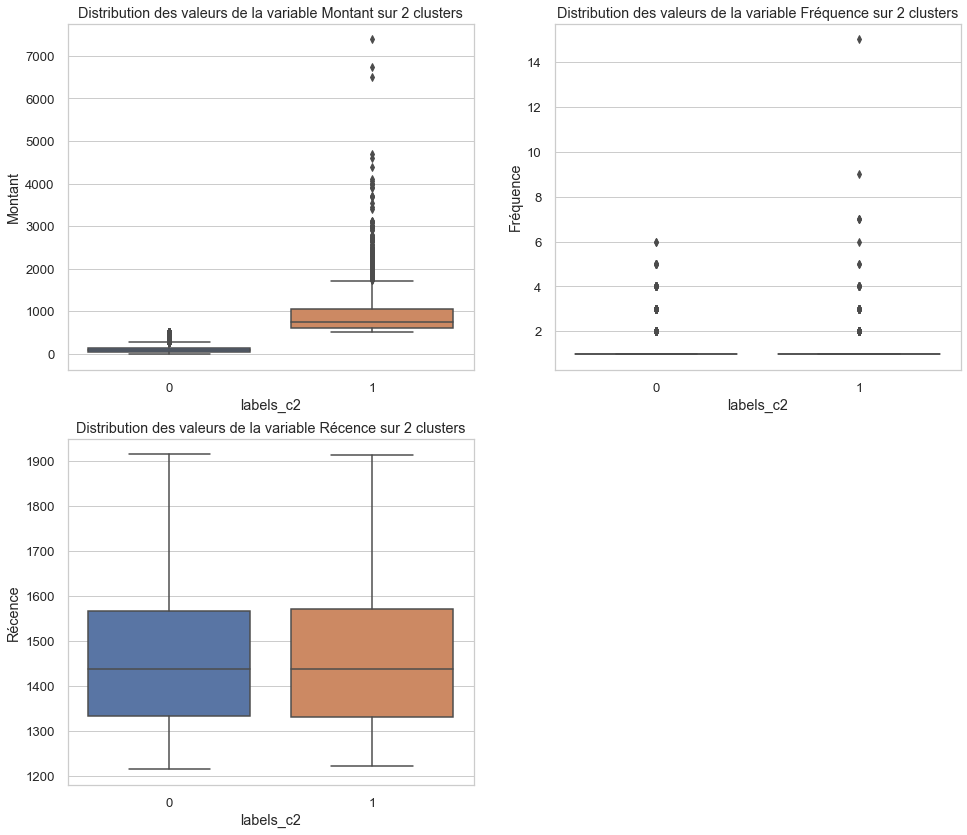

In [374]:
box_plot("labels_c2")

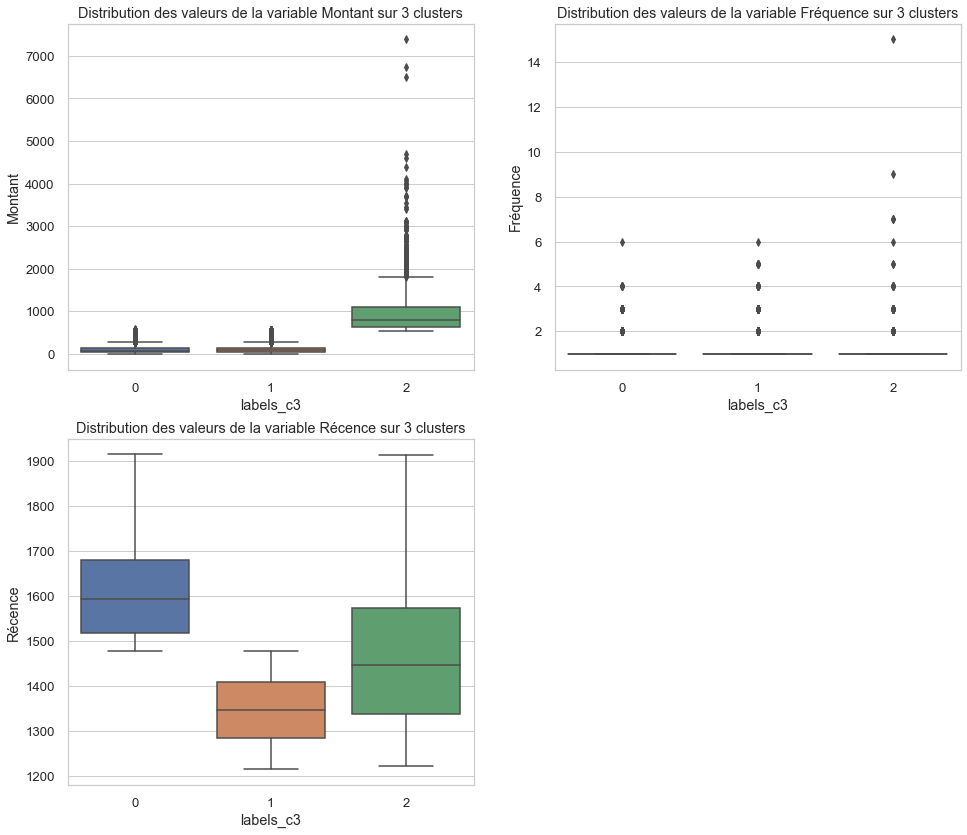

In [375]:
box_plot("labels_c3")

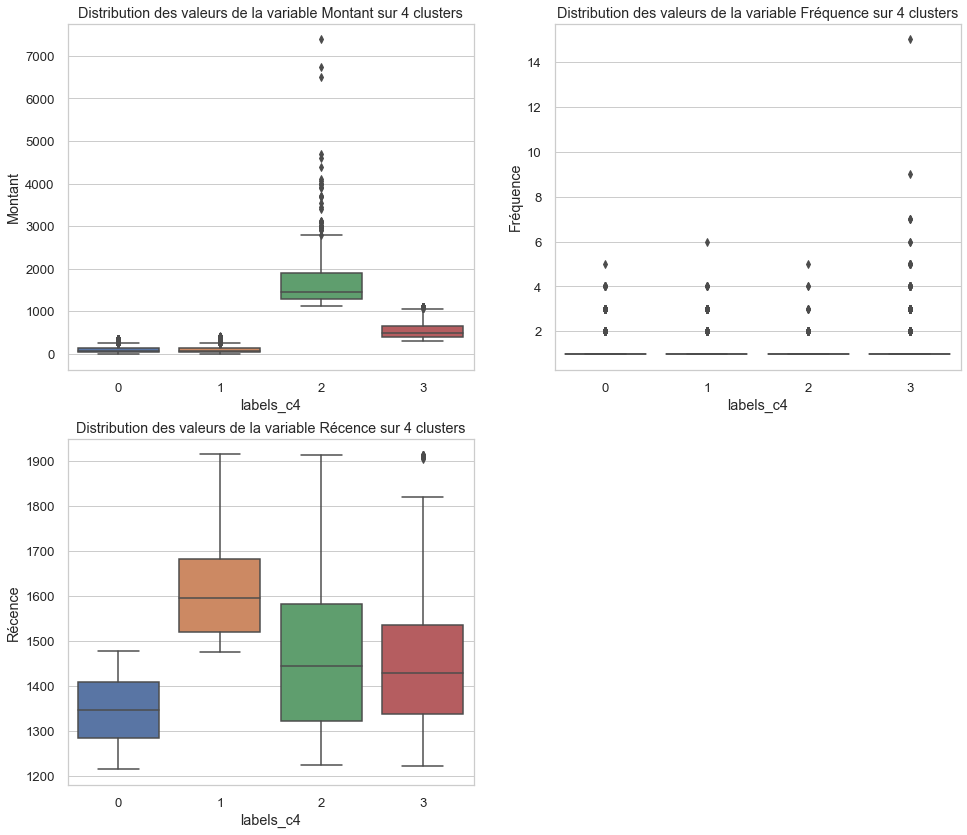

In [376]:
box_plot("labels_c4")

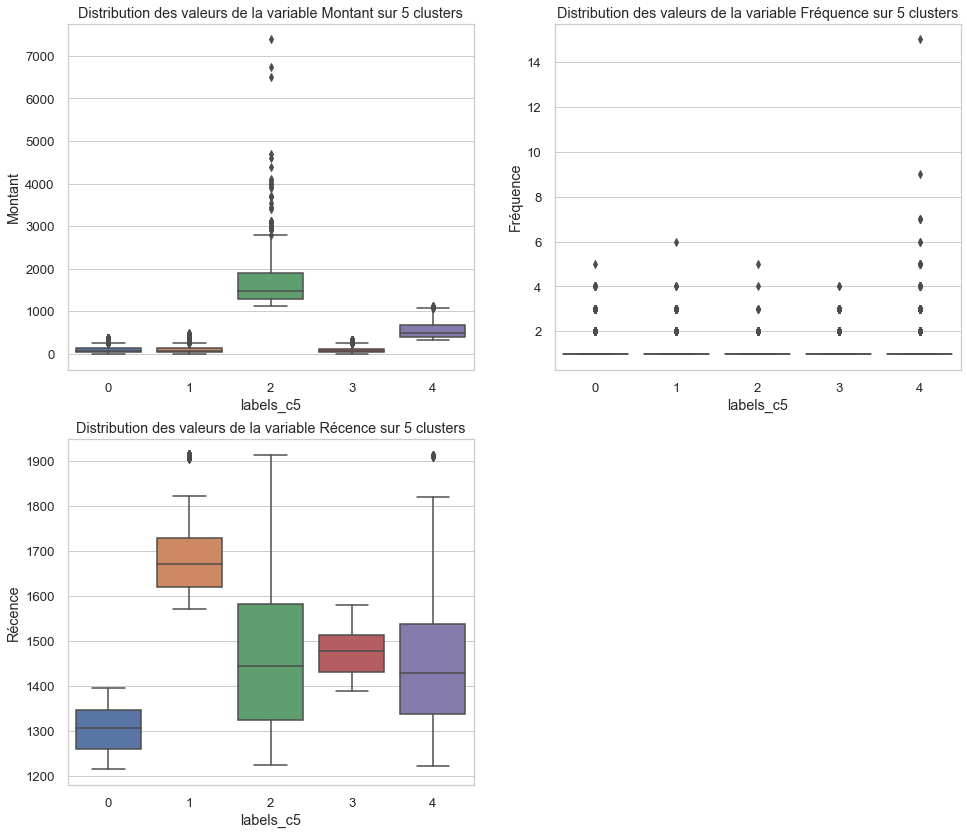

In [379]:
box_plot("labels_c5")

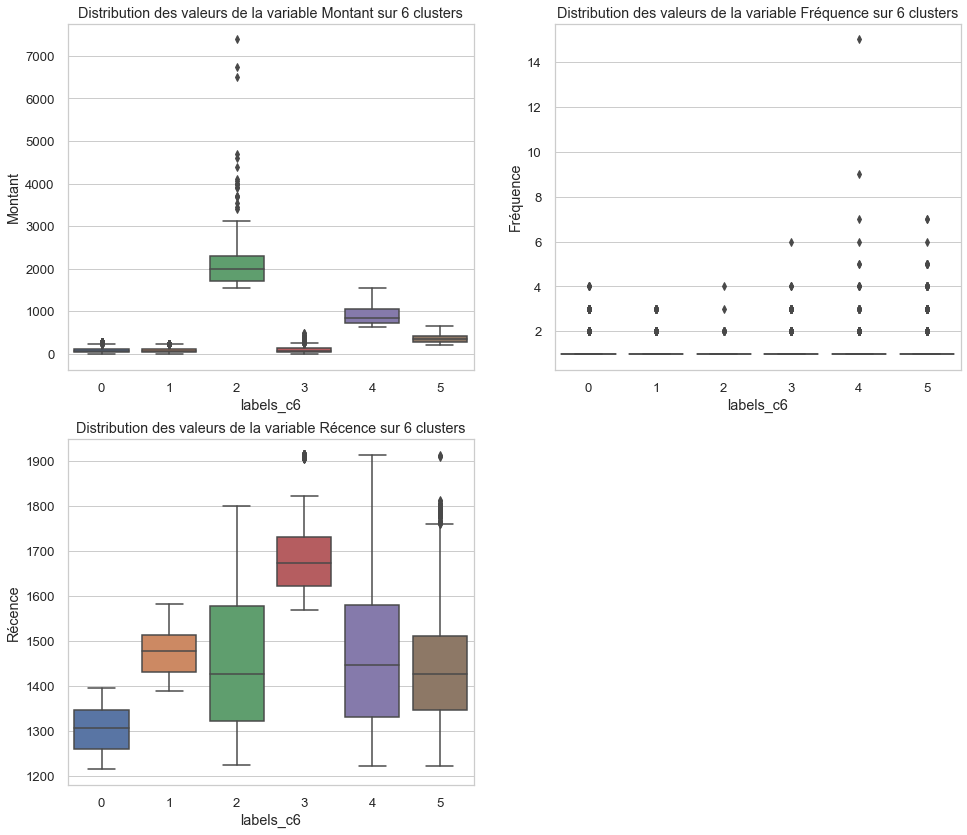

In [378]:
box_plot("labels_c6")

In [485]:
def mean_cluster_RFM(labels):
    """Made for RFM database. Takes one parameter. return the mean values of variables"""
    mean = X_RFM.groupby(labels).mean()
    return mean[["Montant","Fréquence","Récence"]]

In [481]:
mean_cluster_RFM("labels_c2")

Montant  Fréquence      Récence
labels_c2                                    
0          103.197049   1.031545  1457.989378
1          938.184136   1.089577  1460.128205

In [486]:
mean_cluster_RFM("labels_c3")

Montant  Fréquence      Récence
labels_c3                                    
0          103.513816   1.027797  1607.439374
1          104.466683   1.034471  1347.455395
2          963.981520   1.090361  1464.391212

In [487]:
mean_cluster_RFM("labels_c4")

Montant  Fréquence      Récence
labels_c4                                     
0            92.936820   1.030525  1347.536801
1            94.500355   1.025947  1608.717647
2          1698.098591   1.070465  1464.500750
3           548.260928   1.111068  1448.631333

In [488]:
mean_cluster_RFM("labels_c5")

Montant  Fréquence      Récence
labels_c5                                     
0            95.707722   1.031712  1307.097927
1            97.373200   1.025597  1679.522246
2          1700.677364   1.066265  1464.795181
3            90.849732   1.027806  1475.919913
4           558.163566   1.111587  1448.402489

- On remarque que la variable Fréquence ne permets pas de faire une distingtion entre les différents clusters. Le meilleur nombre de clusters qui permets de faire une segmentation des clients semble être entre k=4 et k=5.

Pour k = 4 : 
* Montant : Le cluster n°2 (en vert) a effectué des achats avec des montants plus élevés que le cluster n°3 (en rouge). Le cluster rouge a effectué des achats avec des montants plus élevés que les clusters 0 et 1.
* Récence : Le cluster n°0 a effectué les achats les plus récents. Le cluster n°1 a effectué les achats les plus anciennes. 

Pour k = 5 :
* Montant : Le cluster n°2 (en vert) a effectué des achats avec des montants plus élevés.
* Récence : Le cluster n°0 a effectué les achats les plus récentes, le cluster 1 quant à lui a effectué les achats les plus anciennes.


* **Le clustering k=4 est retenu pour la segmentation avec les variables RFM.**  

- Je vais maintenant faire le clustering en rajoutant l'avis comme une variable supplémentaire 

### RFM+Avis - Silhouette

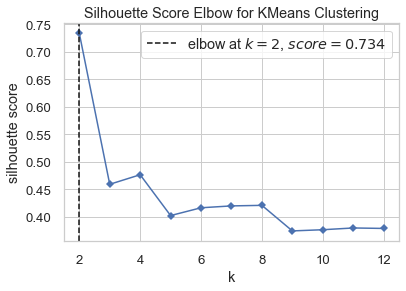

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [413]:
model_RFM_avis = cluster.KMeans()
visualizer4 = KElbowVisualizer(model_RFM_avis, k=(2,13), metric='silhouette', timings=False)
visualizer4.fit(X_RFM_avis)   
visualizer4.show()

### RFM+Avis - Calinski harabasz

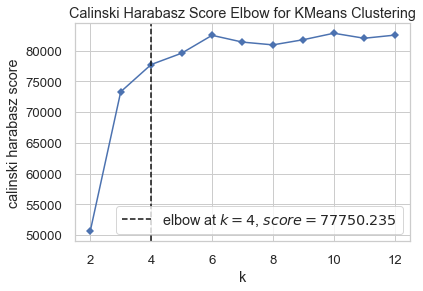

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [414]:
visualizer5 = KElbowVisualizer(model_RFM_avis, k=(2,13), metric='calinski_harabasz', timings=False)
visualizer5.fit(X_RFM_avis)   
visualizer5.show()

### RFM+Avis Inertie/Distortion

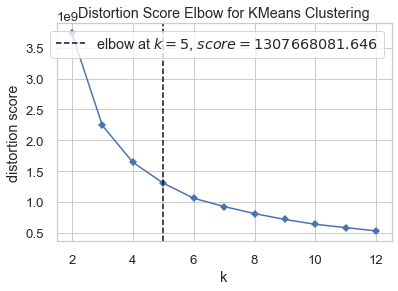

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [415]:
visualizer6 = KElbowVisualizer(model_RFM_avis, k=(2,13), metric='distortion', timings=False)
visualizer6.fit(X_RFM_avis)   
visualizer6.show()

* **Les scores des métriques suggèrent un k compris entre 2 et 5** 

### RFM+Avis - Analyse multivariées - Boxplots

[Text(0.5, 1.0, 'Distribution des valeurs des variables RFM+Avis sur 6 clusters')]

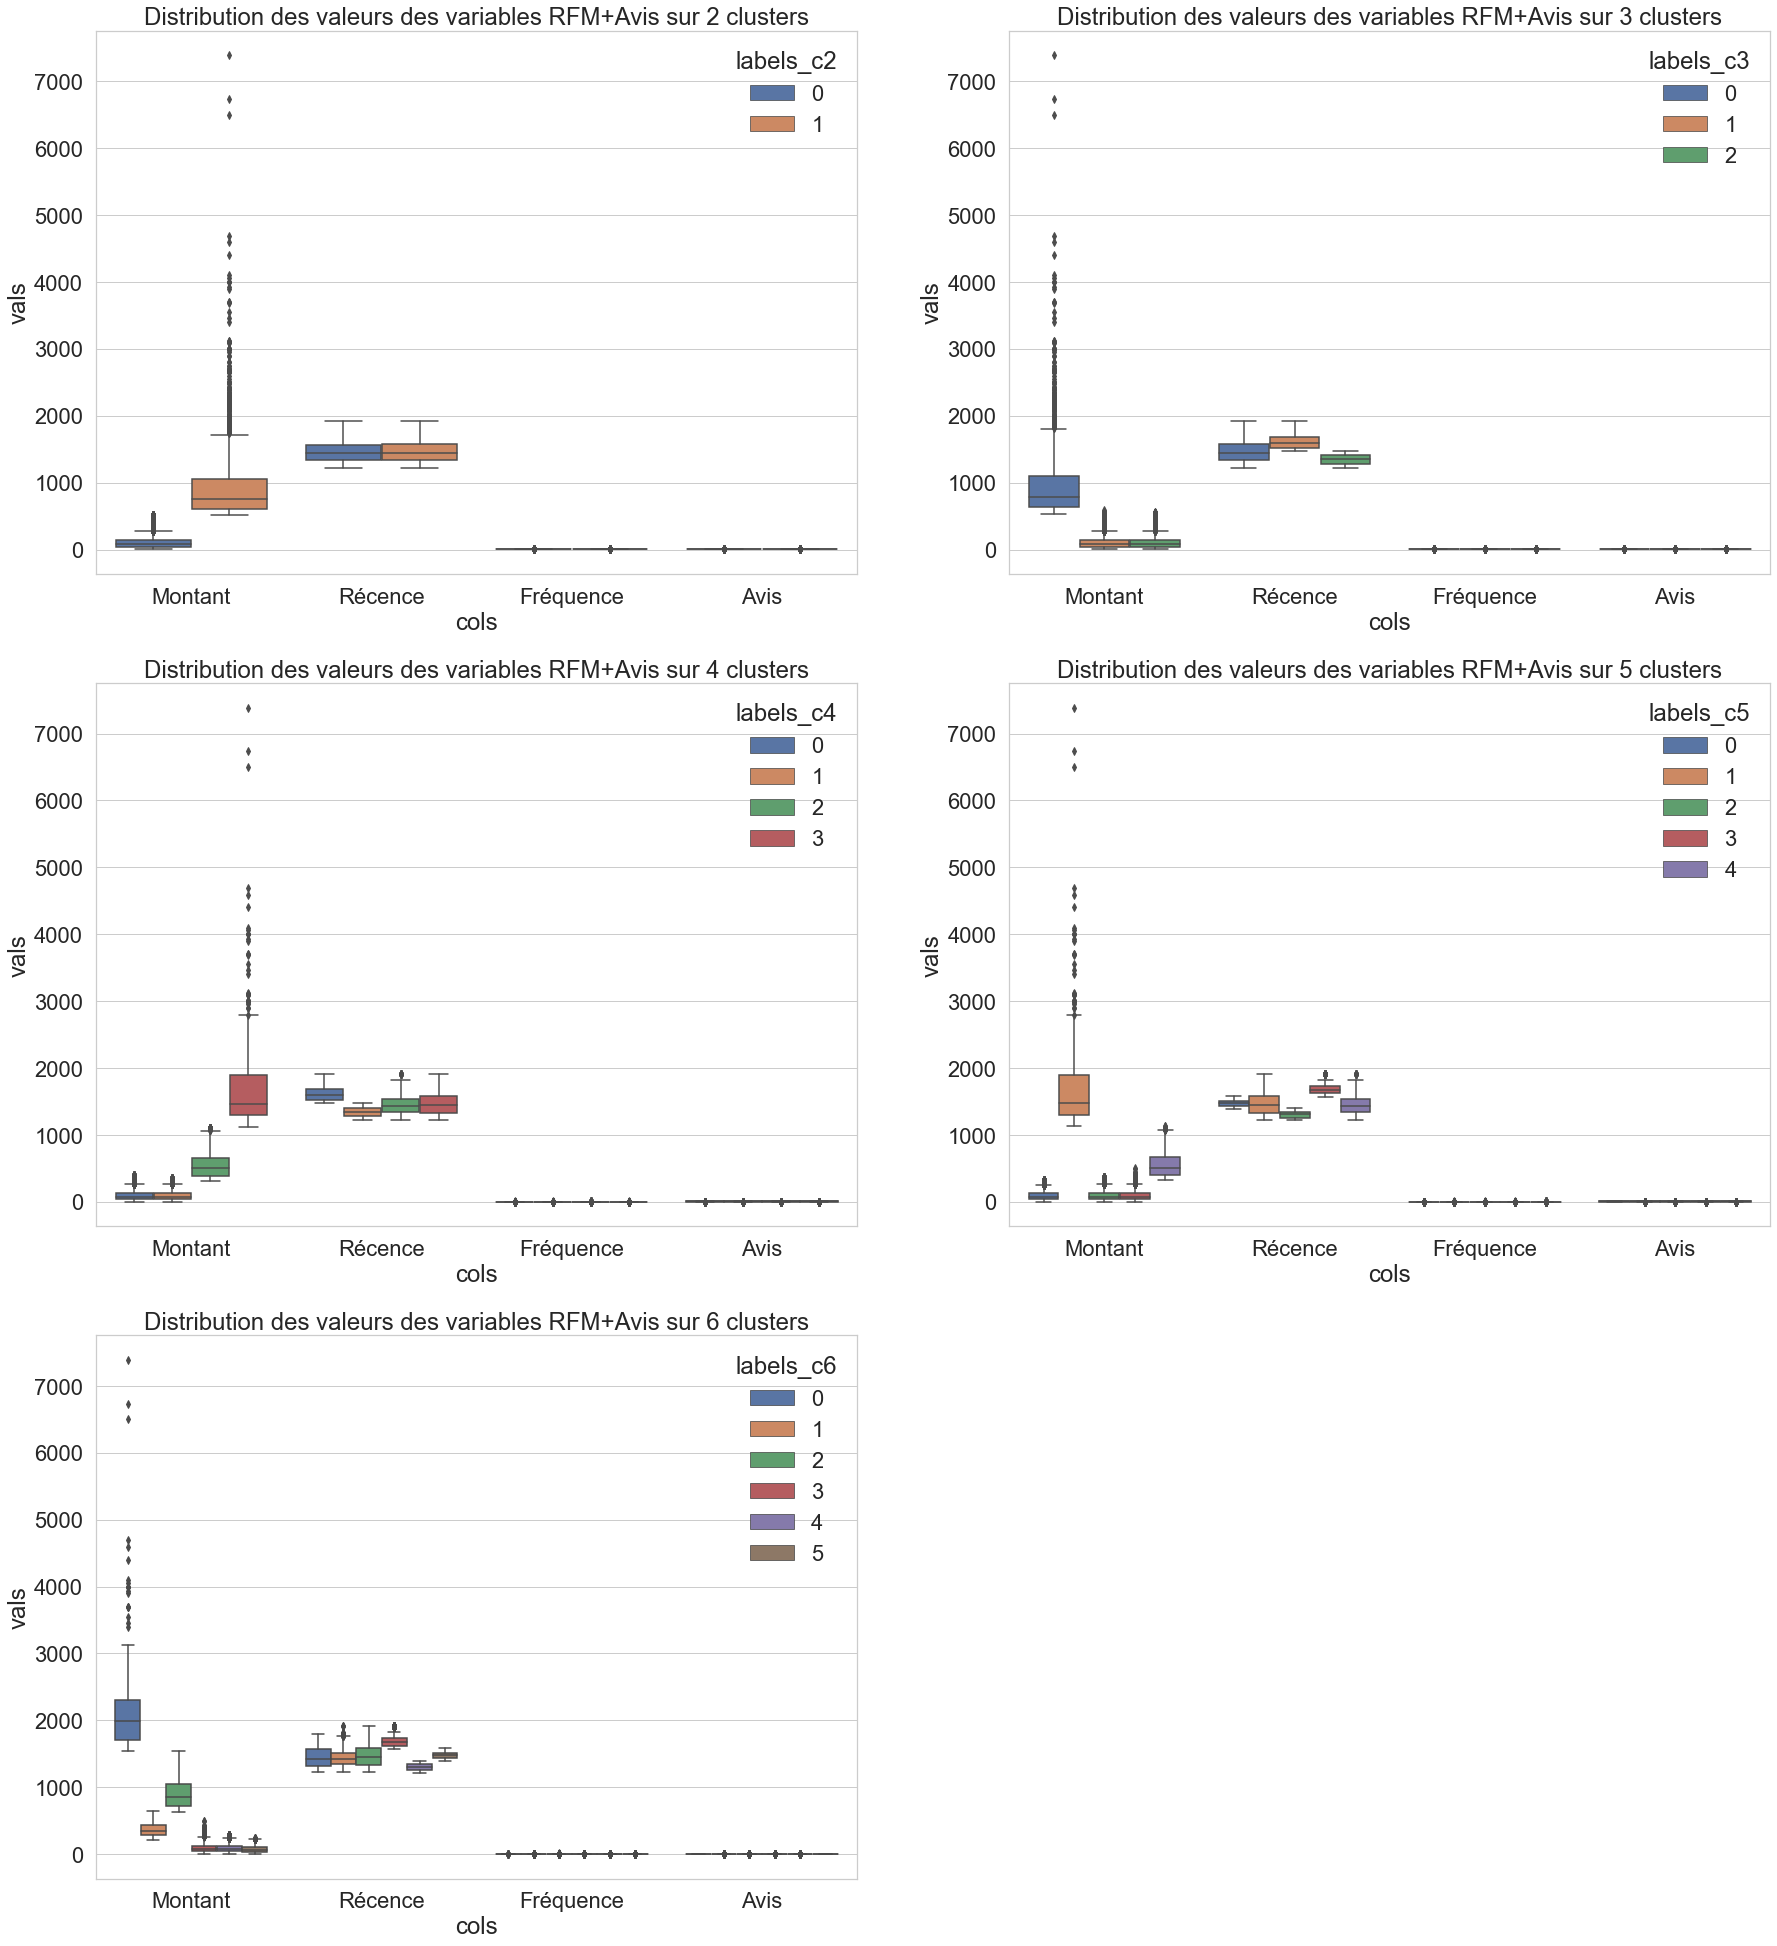

In [392]:
myclust_RFM_Avis_2= cluster.KMeans(n_clusters=2)
myclust_RFM_Avis_2.fit(X_RFM_avis)
X_RFM_avis["labels_c2"] = myclust_RFM_Avis_2.labels_

myclust_RFM_Avis_3= cluster.KMeans(n_clusters=3)
myclust_RFM_Avis_3.fit(X_RFM_avis)
X_RFM_avis["labels_c3"] = myclust_RFM_Avis_3.labels_

myclust_RFM_Avis_4= cluster.KMeans(n_clusters=4)
myclust_RFM_Avis_4.fit(X_RFM_avis)
X_RFM_avis["labels_c4"] = myclust_RFM_Avis_4.labels_

myclust_RFM_Avis_5= cluster.KMeans(n_clusters=5)
myclust_RFM_Avis_5.fit(X_RFM_avis)
X_RFM_avis["labels_c5"] = myclust_RFM_Avis_5.labels_

myclust_RFM_Avis_6= cluster.KMeans(n_clusters=6)
myclust_RFM_Avis_6.fit(X_RFM_avis)
X_RFM_avis["labels_c6"] = myclust_RFM_Avis_6.labels_

X_RFM_avis_2c = X_RFM_avis[["Montant","Récence","Fréquence","Avis","labels_c2"]]
dfm_2_avis = X_RFM_avis_2c.melt('labels_c2', var_name='cols', value_name='vals')

X_RFM_avis_3c = X_RFM_avis[["Montant","Récence","Fréquence","Avis","labels_c3"]]
dfm_3_avis = X_RFM_avis_3c.melt('labels_c3', var_name='cols', value_name='vals')

X_RFM_avis_4c = X_RFM_avis[["Montant","Récence","Fréquence","Avis","labels_c4"]]
dfm_4_avis = X_RFM_avis_4c.melt('labels_c4', var_name='cols', value_name='vals')

X_RFM_avis_5c = X_RFM_avis[["Montant","Récence","Fréquence","Avis","labels_c5"]]
dfm_5_avis = X_RFM_avis_5c.melt('labels_c5', var_name='cols', value_name='vals')

X_RFM_avis_6c = X_RFM_avis[["Montant","Récence","Fréquence","Avis","labels_c6"]]
dfm_6_avis = X_RFM_avis_6c.melt('labels_c6', var_name='cols', value_name='vals')

plt.figure(figsize=(30,34))
sns.set(font_scale = 2)
sns.set_style("whitegrid")

ax1 = plt.subplot(3,2,1)
sns.boxplot(x="cols", y="vals",hue="labels_c2",data=dfm_2_avis, ax=ax1).set(title="Distribution des valeurs des variables RFM+Avis sur 2 clusters")

ax2 = plt.subplot(3,2,2)
sns.boxplot(x="cols", y="vals",hue="labels_c3",data=dfm_3_avis, ax=ax2).set(title="Distribution des valeurs des variables RFM+Avis sur 3 clusters")

ax3 = plt.subplot(3,2,3)
sns.boxplot(x="cols", y="vals",hue="labels_c4",data=dfm_4_avis, ax=ax3).set(title="Distribution des valeurs des variables RFM+Avis sur 4 clusters")

ax4 = plt.subplot(3,2,4)
sns.boxplot(x="cols", y="vals",hue="labels_c5",data=dfm_5_avis, ax=ax4).set(title="Distribution des valeurs des variables RFM+Avis sur 5 clusters")

ax5 = plt.subplot(3,2,5)
sns.boxplot(x="cols", y="vals",hue="labels_c6",data=dfm_6_avis, ax=ax5).set(title="Distribution des valeurs des variables RFM+Avis sur 6 clusters")


In [459]:
def box_plot_avis(labels):
    '''Takes one parameter. Return box plot'''
    plt.figure(figsize=(16,14))
    sns.set(font_scale = 1.2)
    sns.set_style("whitegrid")
    
    ax1 = plt.subplot(2, 2, 1) 
    sns.boxplot(x=labels, y="Montant",data=X_RFM_avis,ax=ax1).set(title="Distribution des valeurs de la variable Montant sur {} clusters".format(len(X_RFM_avis[labels].unique())))
    
    ax2 = plt.subplot(2, 2, 2)
    sns.boxplot(x=labels, y="Fréquence",data=X_RFM_avis,ax=ax2).set(title="Distribution des valeurs de la variable Fréquence sur {} clusters".format(len(X_RFM_avis[labels].unique())))

    ax3 = plt.subplot(2, 2, 3) 
    sns.boxplot(x=labels, y="Récence",data=X_RFM_avis, ax=ax3).set(title="Distribution des valeurs de la variable Récence sur {} clusters".format(len(X_RFM_avis[labels].unique())))

    ax4 = plt.subplot(2, 2, 4) 
    sns.boxplot(x=labels, y="Avis",data=X_RFM_avis, ax=ax4).set(title="Distribution des valeurs de la variable Avis sur {} clusters".format(len(X_RFM_avis[labels].unique())))

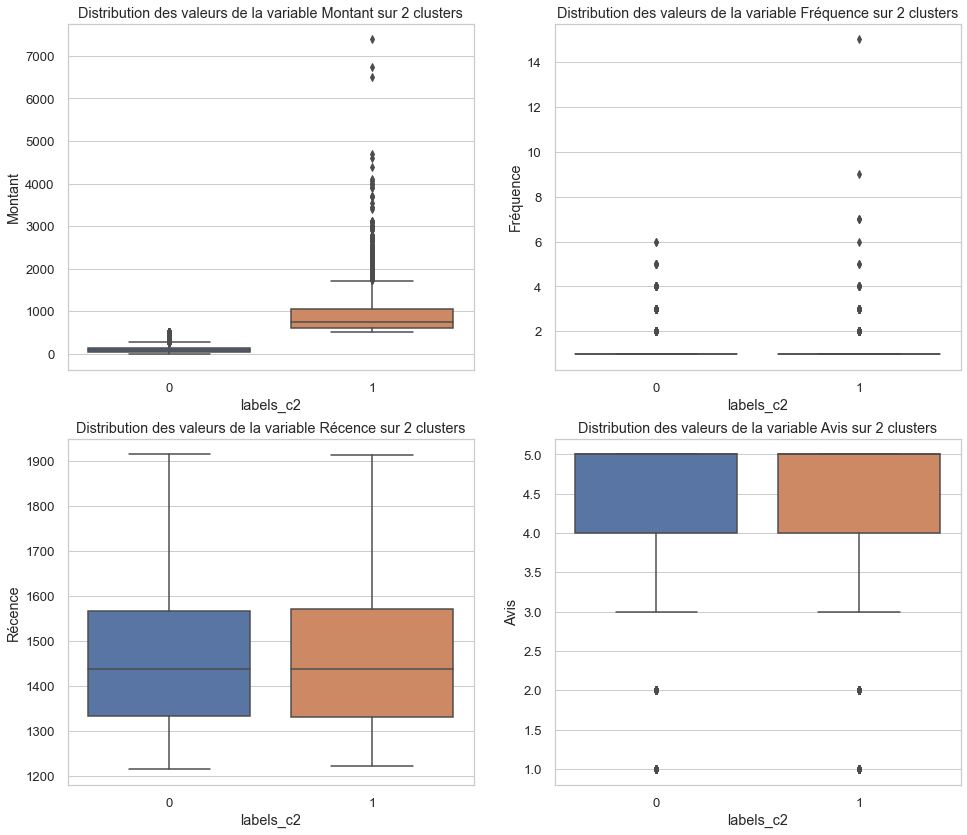

In [398]:
box_plot_avis("labels_c2")

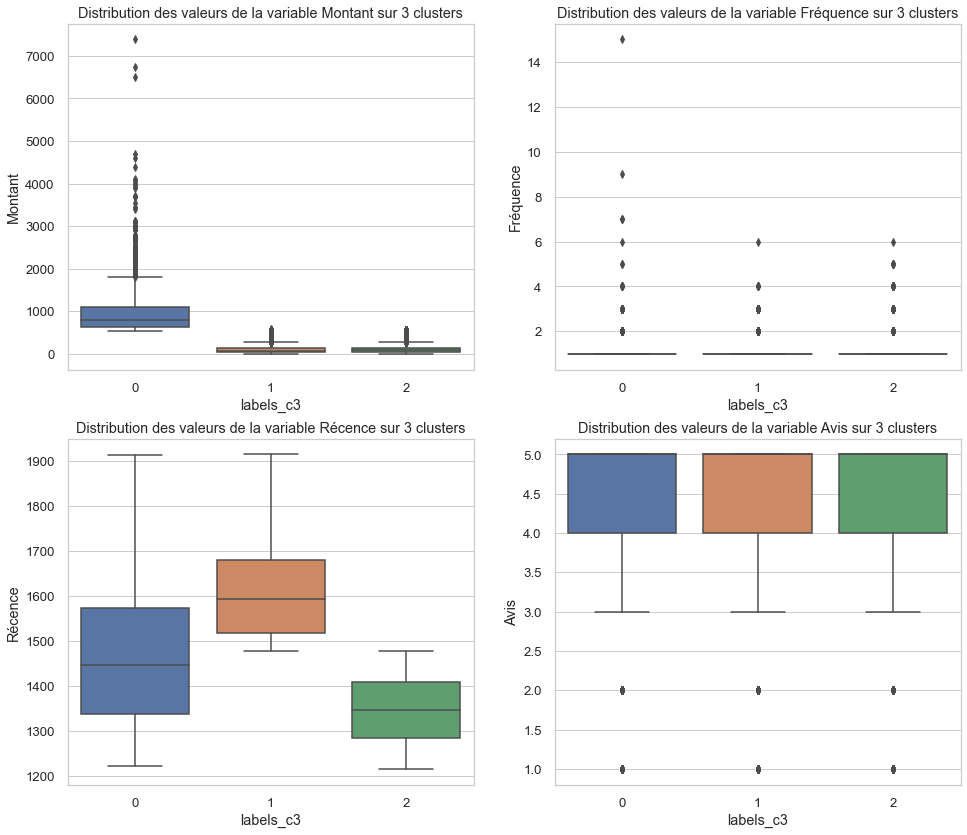

In [399]:
box_plot_avis("labels_c3")

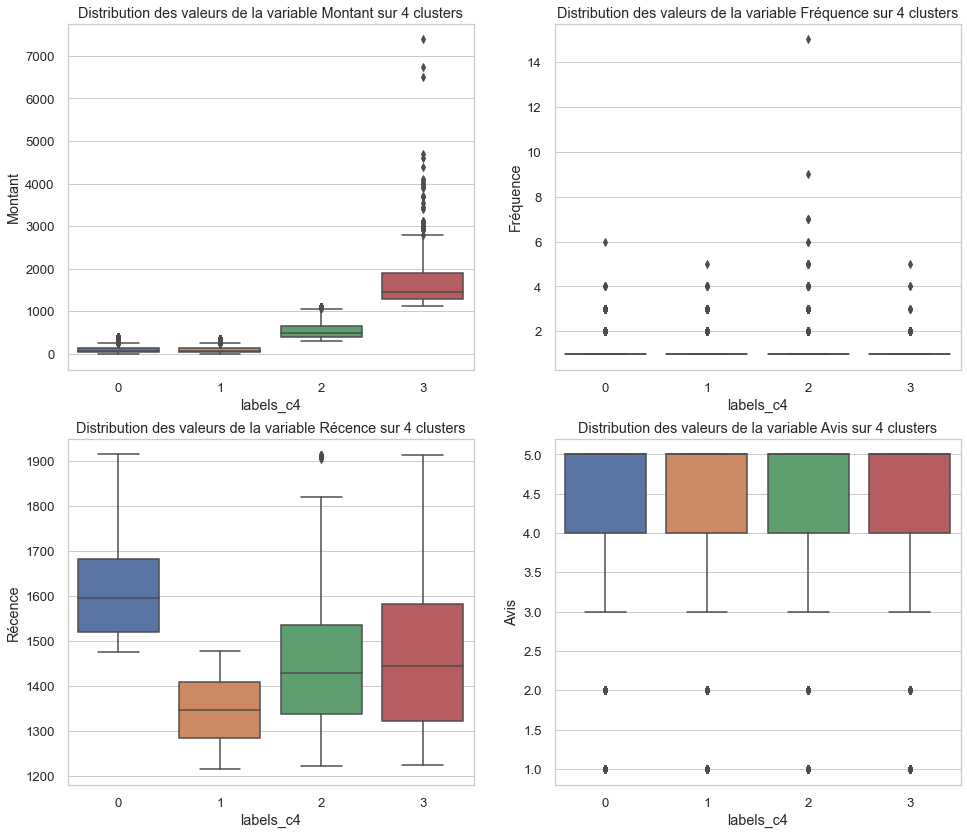

In [400]:
box_plot_avis("labels_c4")

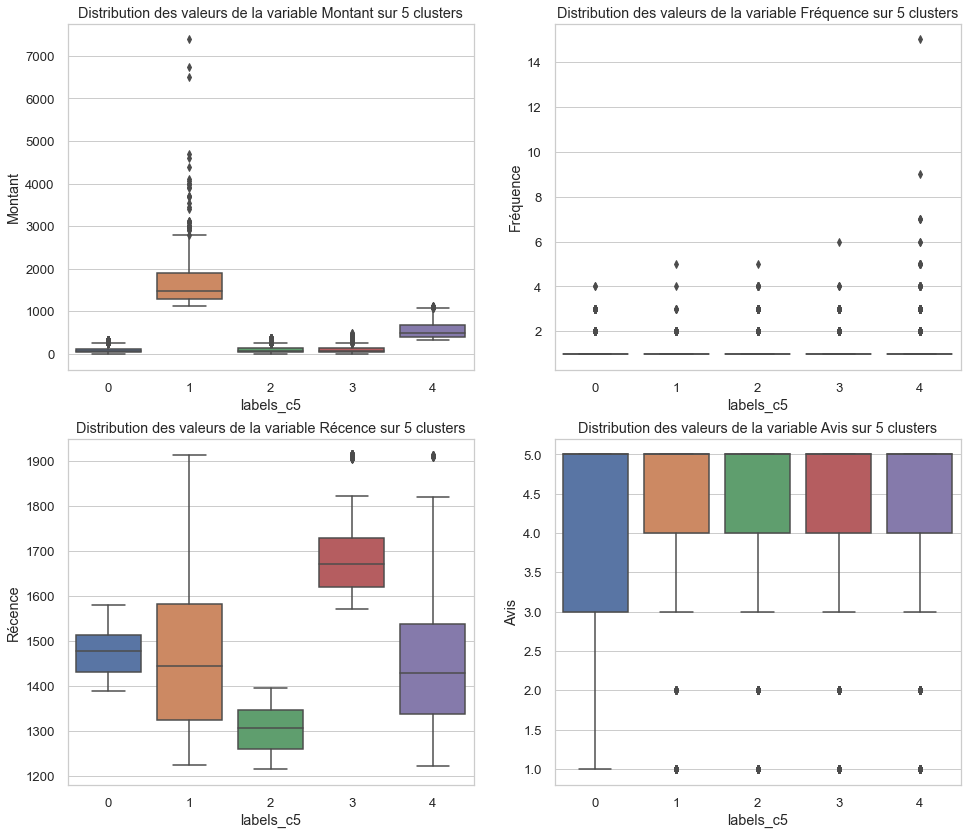

In [401]:
box_plot_avis("labels_c5")

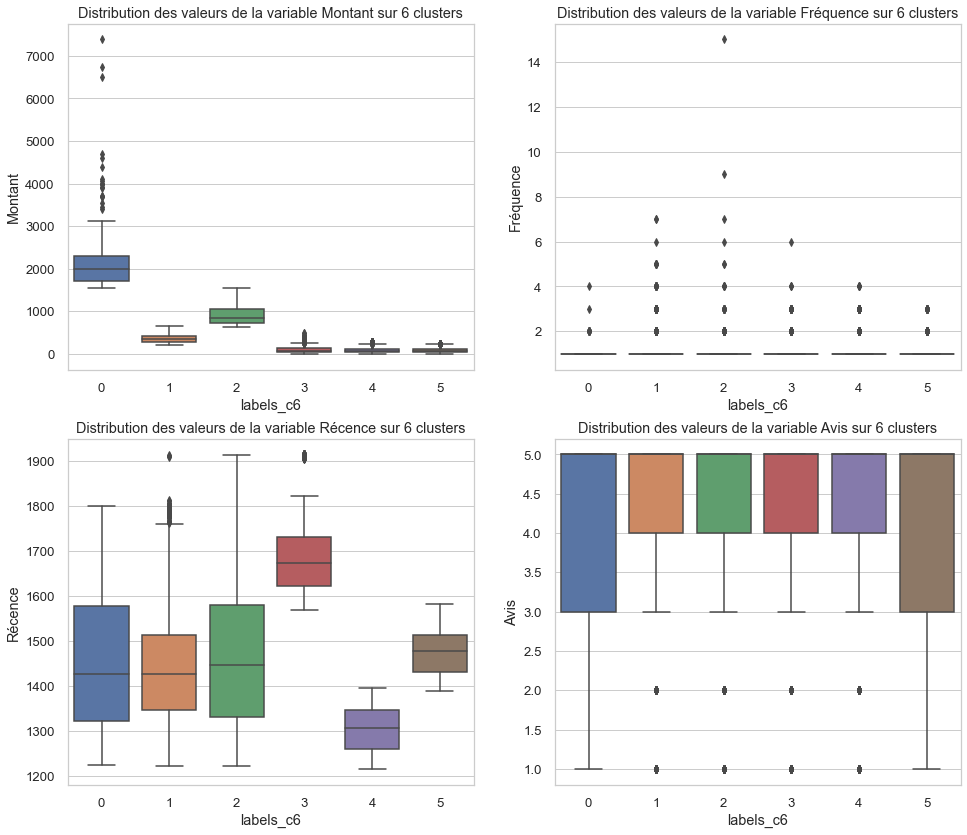

In [402]:
box_plot_avis("labels_c6")

- entre k 2 et 5, seulement le clustering k=5 nous permets de différencier un peu la variabilité des avis des clients. Le cluster n°0 (en bleu) présente des clients moins contents par rapport aux autres clusters.
- Le cluster k=5 va etre retenu pour une segmentation qui tient compte de l'avis des clients.

In [497]:
def mean_cluster_RFM_Avis(labels):
    """Made for RFM + Review database. Takes one parameter. return the mean values of variables"""
    mean = X_RFM_avis.groupby(labels).mean()
    return mean[["Montant","Fréquence","Récence","Avis"]]

In [500]:
mean_cluster_RFM_Avis("labels_c2")

Montant  Fréquence      Récence      Avis
labels_c2                                              
0          103.197049   1.031545  1457.989378  4.105966
1          938.184136   1.089577  1460.128205  4.040626

In [501]:
mean_cluster_RFM_Avis("labels_c3")

Montant  Fréquence      Récence      Avis
labels_c3                                              
0          963.981520   1.090361  1464.391212  4.042523
1          103.517883   1.027797  1607.436008  4.106038
2          104.463700   1.034472  1347.452890  4.105583

In [502]:
mean_cluster_RFM_Avis("labels_c4")

Montant  Fréquence      Récence      Avis
labels_c4                                               
0            94.457060   1.025937  1608.642278  4.109199
1            92.893826   1.030523  1347.484371  4.108082
2           547.663357   1.110938  1448.684282  4.036915
3          1698.098591   1.070465  1464.500750  4.004498

In [503]:
mean_cluster_RFM_Avis("labels_c5")

Montant  Fréquence      Récence      Avis
labels_c5                                               
0            90.765951   1.027794  1475.679948  3.990675
1          1700.677364   1.066265  1464.795181  4.000000
2            95.693408   1.031708  1306.962880  4.191864
3            97.361540   1.025561  1679.360017  4.159671
4           557.562720   1.111676  1448.519731  4.033971

### Visualisation 2D des clusters

Je vais présenter en 2D les clusters obtenus avec k=5 pour les variables RFM+Avis sur les axes Montant et Récence :

In [483]:
def num_cl_avis(labels):
    '''Made for RFM + Review database. Takes one parameter. Return the sum of clients in each cluster and the total'''
    num_0 = X_RFM_avis[X_RFM_avis[labels] == 0].shape[0]
    num_1 = X_RFM_avis[X_RFM_avis[labels] == 1].shape[0]
    num_2 = X_RFM_avis[X_RFM_avis[labels] == 2].shape[0]
    num_3 = X_RFM_avis[X_RFM_avis[labels] == 3].shape[0]
    num_4 = X_RFM_avis[X_RFM_avis[labels] == 4].shape[0]
    num_5 = X_RFM_avis[X_RFM_avis[labels] == 5].shape[0]

    k = {'cluster 1' : [num_0] ,'cluster 2': [num_1], 'cluster 3': [num_2], 'cluster 4' : [num_3],'cluster 5' : [num_4],'cluster 6' : [num_5]}
    k = pd.DataFrame(k, index=['k{}'.format(len(X_RFM_avis[labels].unique()))])
    k["total_clients"] = k.sum(axis=1)
    k.replace(0, np.nan,inplace=True)

    return k

In [504]:
num_cl_avis("labels_c5")

cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6  \
k5      33029        664      33998      20774       4916        NaN   

    total_clients  
k5          93381

In [447]:
num_clusters_avis = num_cl_avis("labels_c2").append([num_cl_avis("labels_c3"),num_cl_avis("labels_c3"),num_cl_avis("labels_c4"),num_cl_avis("labels_c5"),num_cl_avis("labels_c6")], sort=False)
num_clusters_avis = num_clusters_avis[["cluster 1","cluster 2","cluster 3","cluster 4","cluster 5","cluster 6","total_clients"]]
num_clusters_avis

cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6  \
k2      90378       3003        NaN        NaN        NaN        NaN   
k3       2822      38458    52101.0        NaN        NaN        NaN   
k3       2822      38458    52101.0        NaN        NaN        NaN   
k4      37244      50323     5147.0      667.0        NaN        NaN   
k5      33029        664    33998.0    20774.0     4916.0        NaN   
k6        307       7127     1754.0    20319.0    32613.0    31261.0   

    total_clients  
k2          93381  
k3          93381  
k3          93381  
k4          93381  
k5          93381  
k6          93381

Text(1675, 100, '22%')

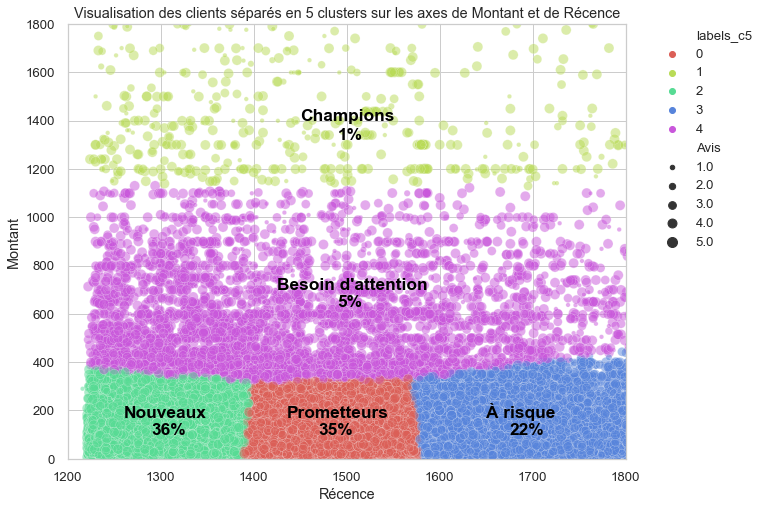

In [510]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=X_RFM_avis, x="Récence", y="Montant", size="Avis", hue = X_RFM_avis["labels_c5"], palette=sns.color_palette("hls", 5), sizes=(20, 100), alpha=0.5).set(title="Visualisation des clients séparés en 5 clusters sur les axes de Montant et de Récence")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

c0 = []
c1 = []
c2 = []
c3 = []
c4 = []

for i in X_RFM_avis["labels_c5"]: 
    if i==0:
        c0.append(i)
    if i ==1:
        c1.append(i)
    if i==2:
        c2.append(i)
    if i==3:
        c3.append(i)
    if i==4:
        c4.append(i)


perc_c0_RFM_avis = len(c0)*100/len(X_RFM_avis["labels_c5"])
perc_c1_RFM_avis = len(c1)*100/len(X_RFM_avis["labels_c5"])
perc_c2_RFM_avis = len(c2)*100/len(X_RFM_avis["labels_c5"])
perc_c3_RFM_avis = len(c3)*100/len(X_RFM_avis["labels_c5"])
perc_c4_RFM_avis = len(c4)*100/len(X_RFM_avis["labels_c5"])


plt.xlim(1200,1800)
plt.ylim(0,1800)
plt.text(1260, 170, "Nouveaux", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1650, 170, "À risque", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1425, 700, "Besoin d'attention", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1435, 170, "Prometteurs", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1450, 1400, "Champions", horizontalalignment='left', size='large', color='black', weight='bold')

plt.text(1470, 100, "{:.0f}%".format(perc_c0_RFM_avis), horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1290, 100, "{:.0f}%".format(perc_c2_RFM_avis), horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1490, 1320, "{:.0f}%".format(perc_c1_RFM_avis), horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1490, 630, "{:.0f}%".format(perc_c4_RFM_avis), horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1675, 100, "{:.0f}%".format(perc_c3_RFM_avis), horizontalalignment='left', size='large', color='black', weight='bold')

- Les **Nouveaux** clients correspondent aux clients qui ont acheté recemment avec un montant faible.
- Les clients **Prometteurs** correspondent aux clients qui ont acheté il ya peu de temps avec un montant faible --> C'est le cluster qui contient les clients les moins contents.
- Le clients **À risque** correspondent aux clients qui ont acheté il ya longtemps avec un montant faible.
- Les clients qui ont **Besoin d'attention** correspondent aux clients qui ont acheté avec un montant moyen.
- Les clients **Champions** correspondent aux clients qui ont acheté avec un montant élevé.

In [506]:
X_RFM_avis.head()

Montant  Fréquence  Récence  Avis  labels_c2  labels_c3  labels_c4  \
0   659.72         15     1230   5.0          1          0          2   
1   657.25          9     1404   3.0          1          0          2   
2   666.66          7     1309   5.0          1          0          2   
3   621.22          7     1416   5.0          1          0          2   
4   614.40          7     1283   5.0          1          0          2   

   labels_c5  labels_c6  
0          4          2  
1          4          2  
2          4          2  
3          4          1  
4          4          1

Je vais maintenant présenter en 2D les clusters obtenus avec k=4 pour les variables RFM sans l'avis sur les axes Montant et Récence :

In [372]:
clust_RFM = cluster.KMeans(n_clusters=4)
clust_RFM.fit(RFM)

KMeans(n_clusters=4)

(0.0, 1800.0)

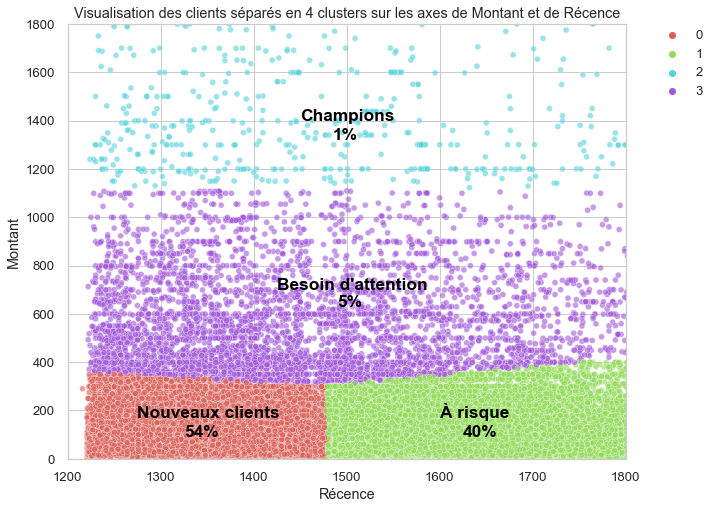

In [492]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=X_RFM, x="Récence", y="Montant", hue = X_RFM.get("labels_c4"), palette=sns.color_palette("hls", 4), sizes=(20, 100),alpha=.6).set(title="Visualisation des clients séparés en 4 clusters sur les axes de Montant et de Récence")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(7.1,7.5)
plt.ylim(1.8,8)

c0 = []
c1 = []
c2 = []
c3 = []

for i in X_RFM["labels_c4"]: 
    if i==0:
        c0.append(i)
    if i ==1:
        c1.append(i)
    if i==2:
        c2.append(i)
    if i==3:
        c3.append(i)


perc_c0 = len(c0)*100/len(X_RFM["labels_c4"])
perc_c1 = len(c1)*100/len(X_RFM["labels_c4"])
perc_c2 = len(c2)*100/len(X_RFM["labels_c4"])
perc_c3 = len(c3)*100/len(X_RFM["labels_c4"])


plt.text(1275, 170, "Nouveaux clients", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1600, 170, "À risque", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1425, 700, "Besoin d'attention", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1450, 1400, "Champions", horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1490, 630, "{:.0f}%".format(perc_c3), horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1625, 90, "{:.0f}%".format(perc_c1), horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1325, 90, "{:.0f}%".format(perc_c0), horizontalalignment='left', size='large', color='black', weight='bold')
plt.text(1485, 1320, "{:.0f}%".format(perc_c2), horizontalalignment='left', size='large', color='black', weight='bold')
plt.xlim(1200,1800)
plt.ylim(0,1800)

In [484]:
def num_clusters(labels):
    '''Made for RFM. Takes one parameter. Return the sum of clients in each cluster and the total'''

    num_0 = X_RFM[X_RFM[labels] == 0].shape[0]
    num_1 = X_RFM[X_RFM[labels] == 1].shape[0]
    num_2 = X_RFM[X_RFM[labels] == 2].shape[0]
    num_3 = X_RFM[X_RFM[labels] == 3].shape[0]
    num_4 = X_RFM[X_RFM[labels] == 4].shape[0]
    num_5 = X_RFM[X_RFM[labels] == 5].shape[0]

    k = {'cluster 1' : [num_0] ,'cluster 2': [num_1], 'cluster 3': [num_2], 'cluster 4' : [num_3],'cluster 5' : [num_4],'cluster 6' : [num_5]}
    k = pd.DataFrame(k, index=['k{}'.format(len(X_RFM[labels].unique()))])
    k["total_clients"] = k.sum(axis=1)
    k.replace(0, np.nan,inplace=True)
    
    return k

In [493]:
num_clusters("labels_c4")

cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6  \
k4      50352      37230        667       5132        NaN        NaN   

    total_clients  
k4          93381

In [442]:
num_clusters = num_clusters("labels_c2").append([num_clusters("labels_c3"),num_clusters("labels_c3"),num_clusters("labels_c4"),num_clusters("labels_c5"),num_clusters("labels_c6")], sort=False)
num_clusters = num_clusters[["cluster 1","cluster 2","cluster 3","cluster 4","cluster 5","cluster 6","total_clients"]]
num_clusters

cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6  \
k2      90378       3003        NaN        NaN        NaN        NaN   
k3      38457      52102     2822.0        NaN        NaN        NaN   
k3      38457      52102     2822.0        NaN        NaN        NaN   
k4      50352      37230      667.0     5132.0        NaN        NaN   
k5      34056      20745      664.0    33014.0     4902.0        NaN   
k6      32610      31262      307.0    20311.0     1755.0     7136.0   

    total_clients  
k2          93381  
k3          93381  
k3          93381  
k4          93381  
k5          93381  
k6          93381

In [436]:
num_clusters_perc = round(num_clusters*100/93381)

In [437]:
num_clusters_perc

cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6  \
k2       97.0        3.0        NaN        NaN        NaN        NaN   
k3       41.0       56.0        3.0        NaN        NaN        NaN   
k3       41.0       56.0        3.0        NaN        NaN        NaN   
k4       54.0       40.0        1.0        5.0        NaN        NaN   
k5       36.0       22.0        1.0       35.0        5.0        NaN   
k6       35.0       33.0        0.0       22.0        2.0        8.0   

    total_clients  
k2          100.0  
k3          100.0  
k3          100.0  
k4          100.0  
k5          100.0  
k6          100.0

# DBSCAN

### Tuning des hyper-paramètres

l'algorithme DBSCAN considère les clusters comme des zones de haute densité séparées par des zones de faible densité et donc s’appuie sur la densité estimée des clusters pour effectuer le partitionnement. 

Je vais évaluer l'algorithme DBSCAN en modifiant les hyperparamètres `eps` et `min_samples_` 

In [15]:
RFM_DBSCAN_0 = DBSCAN(eps=0.5,min_samples=2)
RFM_DBSCAN_0.fit(X_RFM)

labels_DBSCAN_0 = RFM_DBSCAN_0.labels_

silhouetteDBSCAN0 = silhouette_score(X_RFM,labels_DBSCAN_0)
calinskiDBSCAN0 = calinski_harabasz_score(X_RFM,labels_DBSCAN_0)

In [16]:
RFM_DBSCAN_1 = DBSCAN(eps=0.5,min_samples=5)
RFM_DBSCAN_1.fit(X_RFM)

labels_DBSCAN_1 = RFM_DBSCAN_1.labels_

silhouetteDBSCAN1 = silhouette_score(X_RFM,labels_DBSCAN_1)
calinskiDBSCAN1 = calinski_harabasz_score(X_RFM,labels_DBSCAN_1)

In [17]:
RFM_DBSCAN_2 = DBSCAN(eps=0.5,min_samples=20)
RFM_DBSCAN_2.fit(X_RFM)

labels_DBSCAN_2 = RFM_DBSCAN_2.labels_

silhouetteDBSCAN2 = silhouette_score(X_RFM,labels_DBSCAN_2)
calinskiDBSCAN2 = calinski_harabasz_score(X_RFM,labels_DBSCAN_2)

In [18]:
RFM_DBSCAN_3 = DBSCAN(eps=0.5,min_samples=50)
RFM_DBSCAN_3.fit(X_RFM)

labels_DBSCAN_3 = RFM_DBSCAN_3.labels_

silhouetteDBSCAN3 = silhouette_score(X_RFM,labels_DBSCAN_3)
calinskiDBSCAN3 = calinski_harabasz_score(X_RFM,labels_DBSCAN_3)

In [28]:
df_silhouette_DBSCAN = ({"min_samples_2":[silhouetteDBSCAN0],"min_samples_5":[silhouetteDBSCAN1],"min_samples_20":[silhouetteDBSCAN2],"min_samples_50":[silhouetteDBSCAN3]})
df_silhouette_DBSCAN = pd.DataFrame(df_silhouette_DBSCAN).T.reset_index()
df_silhouette_DBSCAN.columns= ["min_samples","silhouette_score"]

[Text(0.5, 1.0, "relation entre le score de silhouette et le paramètre min_samples \nde l'algorithme DBSCAN")]

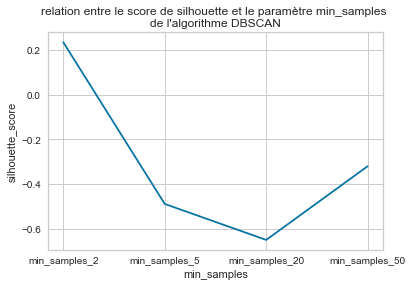

In [34]:
sns.lineplot(x="min_samples",y="silhouette_score",data=df_silhouette_DBSCAN).set(title="relation entre le score de silhouette et le paramètre min_samples \nde l'algorithme DBSCAN")

In [35]:
df_calinski_DBSCAN = ({"min_samples_2":[calinskiDBSCAN0],"min_samples_5":[calinskiDBSCAN1],"min_samples_20":[calinskiDBSCAN2],"min_samples_50":[calinskiDBSCAN3]})
df_calinski_DBSCAN = pd.DataFrame(df_calinski_DBSCAN).T.reset_index()
df_calinski_DBSCAN.columns= ["min_samples","calinski_score"]

[Text(0.5, 1.0, "relation entre le score de calinski et le paramètre min_samples \nde l'algorithme DBSCAN")]

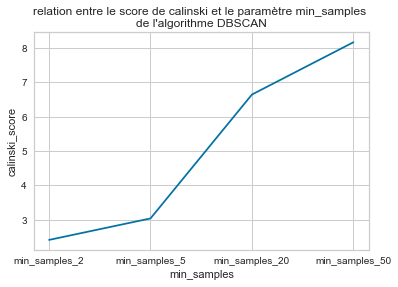

In [38]:
sns.lineplot(x="min_samples",y="calinski_score",data=df_calinski_DBSCAN).set(title="relation entre le score de calinski et le paramètre min_samples \nde l'algorithme DBSCAN")

### Visualisation 2D des clusters formés par DBSCAN

(0.0, 1800.0)

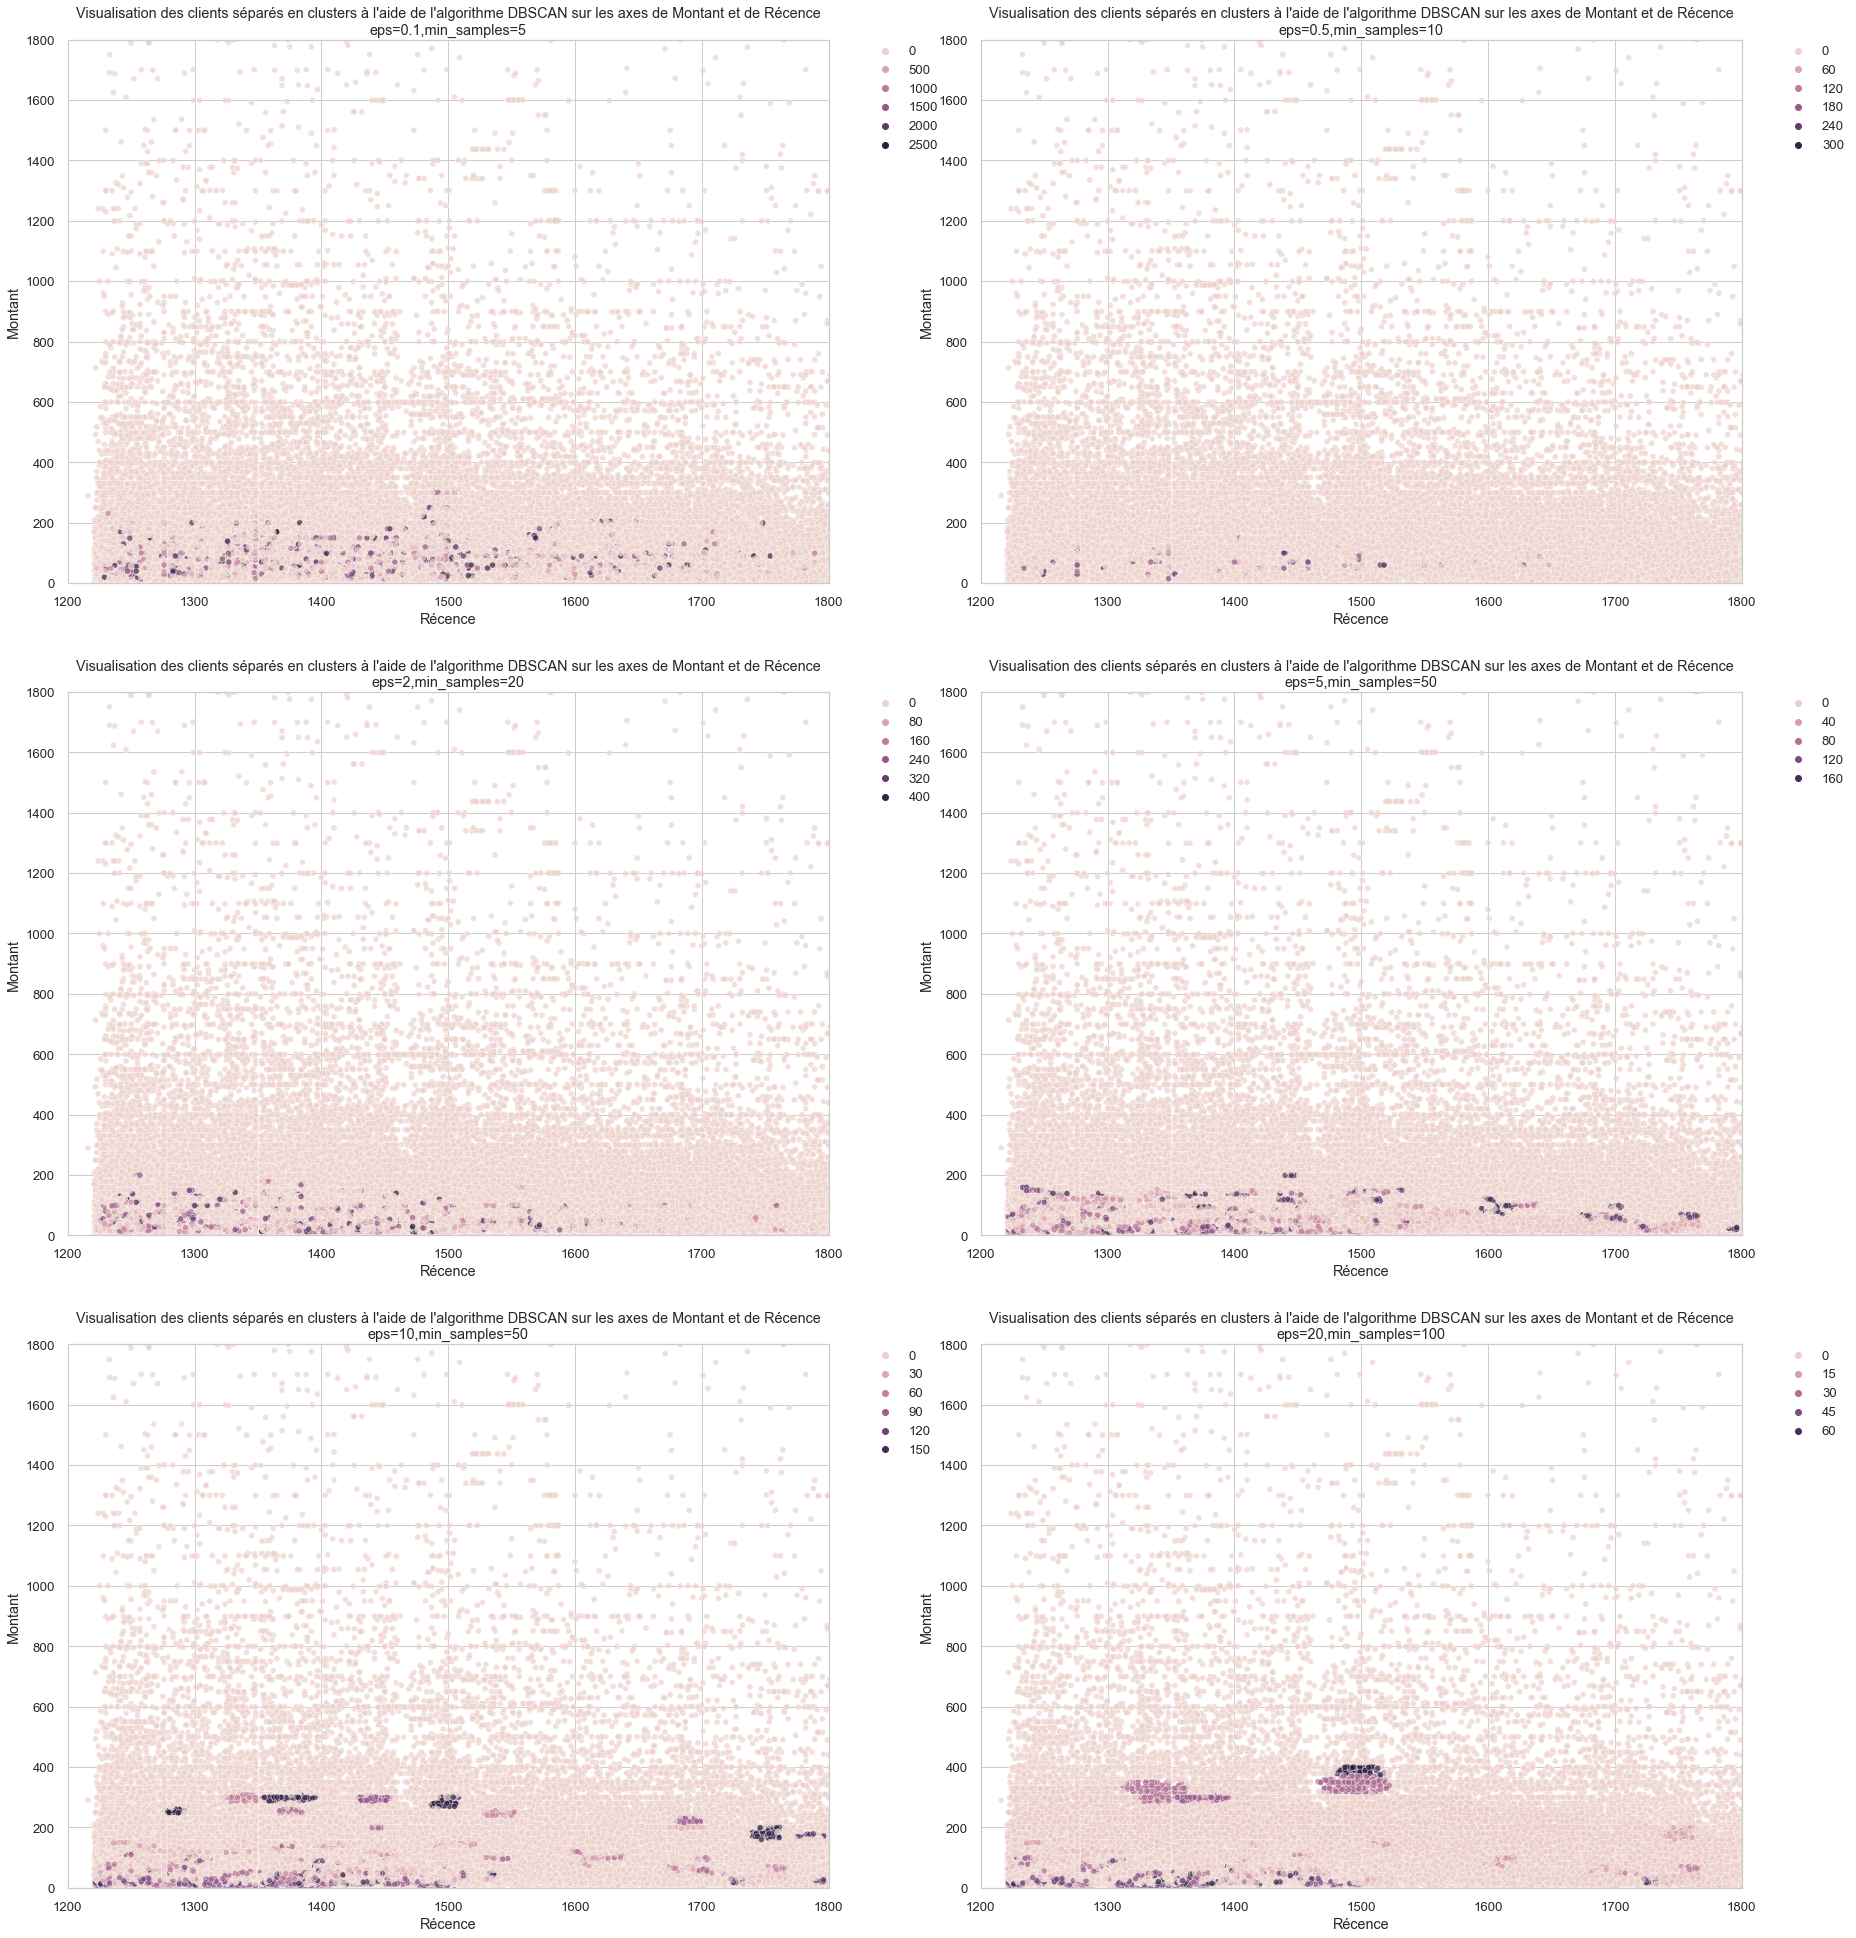

In [449]:
plt.figure(figsize=(30,34))


ax1 = plt.subplot(3,2,1)
RFM_DBSCAN_1 = DBSCAN(eps=0.1,min_samples=5)
RFM_DBSCAN_1.fit(X_RFM)
labels_DBSCAN_1 = RFM_DBSCAN_1.labels_
X_RFM["labels_DBSCAN1"] = RFM_DBSCAN_1.labels_
ClustersDB1 = pd.DataFrame((labels_DBSCAN_1),columns=["Clusters"])    
sns.scatterplot(data=X_RFM, x="Récence", y="Montant", hue = ClustersDB1.get("Clusters"),alpha=.7,ax=ax1).set(title="Visualisation des clients séparés en clusters à l'aide de l'algorithme DBSCAN sur les axes de Montant et de Récence\neps=0.1,min_samples=5")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1200,1800)
plt.ylim(0,1800)

ax2 = plt.subplot(3,2,2)
RFM_DBSCAN_2 = DBSCAN(eps=0.5,min_samples=10)
RFM_DBSCAN_2.fit(X_RFM)
labels_DBSCAN_2 = RFM_DBSCAN_2.labels_
X_RFM["labels_DBSCAN2"] = RFM_DBSCAN_2.labels_
ClustersDB2 = pd.DataFrame((labels_DBSCAN_2),columns=["Clusters"])    
sns.scatterplot(data=X_RFM, x="Récence", y="Montant", hue = ClustersDB2.get("Clusters"),alpha=.7,ax=ax2).set(title="Visualisation des clients séparés en clusters à l'aide de l'algorithme DBSCAN sur les axes de Montant et de Récence\neps=0.5,min_samples=10")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1200,1800)
plt.ylim(0,1800)

ax3 = plt.subplot(3,2,3)
RFM_DBSCAN_3 = DBSCAN(eps=2,min_samples=20)
RFM_DBSCAN_3.fit(X_RFM)
labels_DBSCAN_3 = RFM_DBSCAN_3.labels_
X_RFM["labels_DBSCAN3"] = RFM_DBSCAN_3.labels_
ClustersDB3 = pd.DataFrame((labels_DBSCAN_3),columns=["Clusters"])    
sns.scatterplot(data=X_RFM, x="Récence", y="Montant", hue = ClustersDB3.get("Clusters"),alpha=.7,ax=ax3).set(title="Visualisation des clients séparés en clusters à l'aide de l'algorithme DBSCAN sur les axes de Montant et de Récence\neps=2,min_samples=20")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1200,1800)
plt.ylim(0,1800)

ax4 = plt.subplot(3,2,4)
RFM_DBSCAN_4 = DBSCAN(eps=5,min_samples=50)
RFM_DBSCAN_4.fit(X_RFM)
labels_DBSCAN_4 = RFM_DBSCAN_4.labels_
X_RFM["labels_DBSCAN4"] = RFM_DBSCAN_4.labels_
ClustersDB4 = pd.DataFrame((labels_DBSCAN_4),columns=["Clusters"])    
sns.scatterplot(data=X_RFM, x="Récence", y="Montant", hue = ClustersDB4.get("Clusters"),alpha=.7,ax=ax4).set(title="Visualisation des clients séparés en clusters à l'aide de l'algorithme DBSCAN sur les axes de Montant et de Récence\neps=5,min_samples=50")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1200,1800)
plt.ylim(0,1800)

ax5 = plt.subplot(3,2,5)
RFM_DBSCAN_5 = DBSCAN(eps=10,min_samples=50)
RFM_DBSCAN_5.fit(X_RFM)
labels_DBSCAN_5 = RFM_DBSCAN_5.labels_
X_RFM["labels_DBSCAN5"] = RFM_DBSCAN_5.labels_
ClustersDB5 = pd.DataFrame((labels_DBSCAN_5),columns=["Clusters"])    
sns.scatterplot(data=X_RFM, x="Récence", y="Montant", hue = ClustersDB5.get("Clusters"),alpha=.7,ax=ax5).set(title="Visualisation des clients séparés en clusters à l'aide de l'algorithme DBSCAN sur les axes de Montant et de Récence\neps=10,min_samples=50")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1200,1800)
plt.ylim(0,1800)

ax6 = plt.subplot(3,2,6)
RFM_DBSCAN_6 = DBSCAN(eps=20,min_samples=100)
RFM_DBSCAN_6.fit(X_RFM)
labels_DBSCAN_6 = RFM_DBSCAN_6.labels_
X_RFM["labels_DBSCAN6"] = RFM_DBSCAN_6.labels_
ClustersDB6 = pd.DataFrame((labels_DBSCAN_6),columns=["Clusters"])    
sns.scatterplot(data=X_RFM, x="Récence", y="Montant", hue = ClustersDB6.get("Clusters"),alpha=.7,ax=ax6).set(title="Visualisation des clients séparés en clusters à l'aide de l'algorithme DBSCAN sur les axes de Montant et de Récence\neps=20,min_samples=100")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1200,1800)
plt.ylim(0,1800)

### Nombre de clients dans les clusters

In [450]:
num_DBSCAN1 = X_RFM[X_RFM["labels_DBSCAN1"] != -1].shape[0]
N1 = {'DBSCAN1' : [num_DBSCAN1]}
N1 = pd.DataFrame(N1, index=['N1'])
N1["Non_clustered"] = (93381-(N1.DBSCAN1)) 

num_DBSCAN1 = X_RFM[X_RFM["labels_DBSCAN1"] != -1].shape[0]
N1 = {'DBSCAN1' : [num_DBSCAN1]}
N1 = pd.DataFrame(N1, index=['N1'])
N1["Non_clustered"] = (93381-(N1.DBSCAN1))

num_DBSCAN2 = X_RFM[X_RFM["labels_DBSCAN2"] != -1].shape[0]
N2 = {'DBSCAN2' : [num_DBSCAN2]}
N2 = pd.DataFrame(N2, index=['N2'])
N2["Non_clustered"] = (93381-(N2.DBSCAN2))

num_DBSCAN3 = X_RFM[X_RFM["labels_DBSCAN3"] != -1].shape[0]
N3 = {'DBSCAN3' : [num_DBSCAN3]}
N3 = pd.DataFrame(N3, index=['N3'])
N3["Non_clustered"] = (93381-(N3.DBSCAN3))

num_DBSCAN4 = X_RFM[X_RFM["labels_DBSCAN4"] != -1].shape[0]
N4 = {'DBSCAN4' : [num_DBSCAN4]}
N4 = pd.DataFrame(N4, index=['N4'])
N4["Non_clustered"] = (93381-(N4.DBSCAN4))

num_DBSCAN5 = X_RFM[X_RFM["labels_DBSCAN5"] != -1].shape[0]
N5 = {'DBSCAN5' : [num_DBSCAN5]}
N5 = pd.DataFrame(N5, index=['N5'])
N5["Non_clustered"] = (93381-(N5.DBSCAN5))

num_DBSCAN6 = X_RFM[X_RFM["labels_DBSCAN6"] != -1].shape[0]
N6 = {'DBSCAN6' : [num_DBSCAN6]}
N6 = pd.DataFrame(N6, index=['N6'])
N6["Non_clustered"] = (93381-(N6.DBSCAN6))

In [451]:
num_DBSCAN = N1.append([N2,N3,N4,N5,N6], sort=False)
num_DBSCAN = num_DBSCAN[["DBSCAN1","DBSCAN2","DBSCAN3","DBSCAN4","DBSCAN5","DBSCAN6","Non_clustered"]]
num_DBSCAN

DBSCAN1  DBSCAN2  DBSCAN3  DBSCAN4  DBSCAN5  DBSCAN6  Non_clustered
N1  17388.0      NaN      NaN      NaN      NaN      NaN          75993
N2      NaN   4041.0      NaN      NaN      NaN      NaN          89340
N3      NaN      NaN  18239.0      NaN      NaN      NaN          75142
N4      NaN      NaN      NaN  34121.0      NaN      NaN          59260
N5      NaN      NaN      NaN      NaN  56828.0      NaN          36553
N6      NaN      NaN      NaN      NaN      NaN  55533.0          37848

### Evaluation du bruit 

In [452]:
bruits_ClustersDB1 = []
for i in ClustersDB1.Clusters:
    if i == -1:
        bruits_ClustersDB1.append(i)

bruits_ClustersDB2 = []
for i in ClustersDB2.Clusters:
    if i == -1:
        bruits_ClustersDB2.append(i)
        
bruits_ClustersDB3 = []
for i in ClustersDB3.Clusters:
    if i == -1:
        bruits_ClustersDB3.append(i)
        
bruits_ClustersDB4 = []
for i in ClustersDB4.Clusters:
    if i == -1:
        bruits_ClustersDB4.append(i)
        
bruits_ClustersDB5 = []
for i in ClustersDB5.Clusters:
    if i == -1:
        bruits_ClustersDB5.append(i)
        
bruits_ClustersDB6 = []
for i in ClustersDB6.Clusters:
    if i == -1:
        bruits_ClustersDB6.append(i)

In [453]:
bruits = ({"samples5_eps0.1":[len(bruits_ClustersDB1)],"samples10_eps0.5":[len(bruits_ClustersDB2)],"samples20_eps2":[len(bruits_ClustersDB3)],"samples50_eps5":[len(bruits_ClustersDB4)],"samples50_eps10":[len(bruits_ClustersDB5)],"samples100_eps20":[len(bruits_ClustersDB6)]})
bruits = pd.DataFrame(bruits).T.reset_index()
bruits.columns=["min_samples","bruits"]


[Text(0.5, 1.0, 'bruits des clusters avec BDSCAN en fonctions du min_samples et eps')]

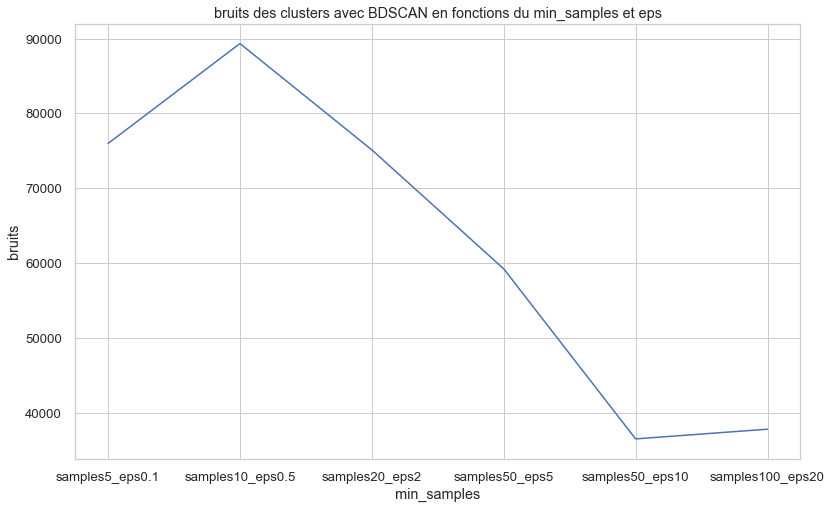

In [456]:
plt.figure(figsize=(13,8))
sns.lineplot(x="min_samples",y="bruits",data=bruits).set(title="bruits des clusters avec BDSCAN en fonctions du min_samples et eps")

**On voit clairement que l'algorithme DBSCAN n'est pas adapté à notre problème de segmentation puisqu'il permet d'exclure beaucoup de clients et le bruits est trop élevé.**

# Clustering hiérarchique agglomératif 

Dans le cas du clustering agglomératif, d'abord chaque point est un cluster à lui tout seul. Ensuite, on trouve les deux clusters les plus proches, et on les agglomère en un seul cluster. Nous pouvons spécifier le nombre de clusters désiré avec le paramètre `n_cluster`.

Comme c'est algorithme est très lourd et lent à exécuter, je vais tester sur les premiers 30000 clients : 

Je vais utiliser 2 types de clustering : 
- **Ward**: permet l'agrégation des clusters de sorte à minimiser l'augmentation de la variance inter-cluster ou inertie.
- **Complete**: permet l'agrégation des clusters de sorte que la distance entre deux clusters est celle entre les deux points les plus éloignés.

In [5]:
X_RFM_30000 = X_RFM.iloc[:30000,:]

### Visualisation 2D des clusters formés par les algorithmes hiérarchiques

(0.0, 2250.0)

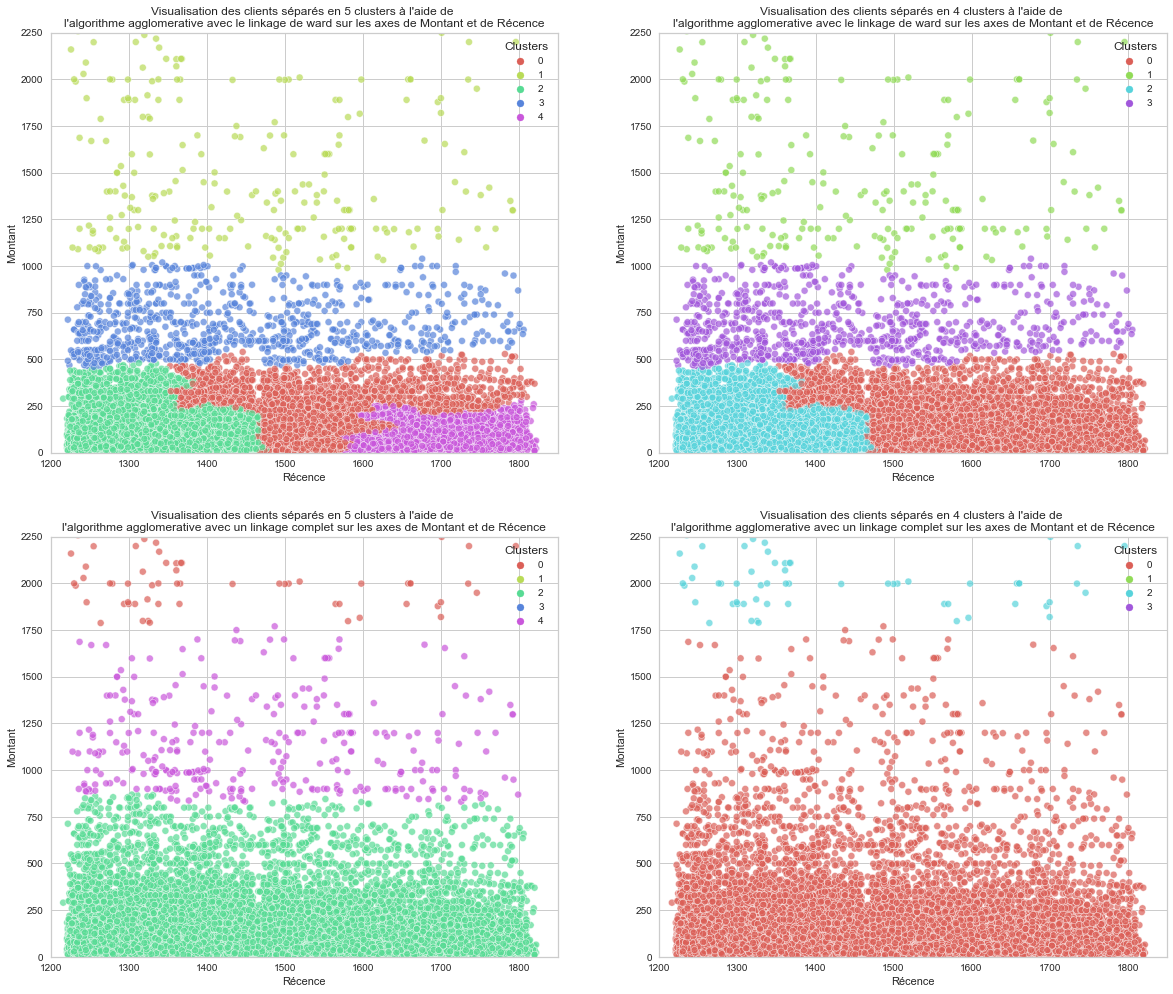

In [10]:
plt.figure(figsize=(20,17))

ax1 = plt.subplot(2,2,1)
RFM_AgglomerativeClustering_0 = AgglomerativeClustering(linkage="ward",n_clusters=5)
RFM_AgglomerativeClustering_0.fit(X_RFM_30000)
labels_AgglomerativeClustering_0 = RFM_AgglomerativeClustering_0.labels_
Clusters = pd.DataFrame((labels_AgglomerativeClustering_0),columns=["Clusters"])    
sns.scatterplot(data=X_RFM_30000, x="Récence", y="Montant",palette=sns.color_palette("hls", 5), hue = Clusters.get("Clusters"),alpha=.7,ax=ax1).set(title="Visualisation des clients séparés en 5 clusters à l'aide de \nl'algorithme agglomerative avec le linkage de ward sur les axes de Montant et de Récence")
plt.xlim(1200,1850)
plt.ylim(0,2250)

ax2 = plt.subplot(2,2,2)
RFM_AgglomerativeClustering_1 = AgglomerativeClustering(linkage="ward",n_clusters=4)
RFM_AgglomerativeClustering_1.fit(X_RFM_30000)
labels_AgglomerativeClustering_1 = RFM_AgglomerativeClustering_1.labels_
Clusters = pd.DataFrame((labels_AgglomerativeClustering_1),columns=["Clusters"])    
sns.scatterplot(data=X_RFM_30000, x="Récence", y="Montant",palette=sns.color_palette("hls", 4), hue = Clusters.get("Clusters"),alpha=.7,ax=ax2).set(title="Visualisation des clients séparés en 4 clusters à l'aide de \nl'algorithme agglomerative avec le linkage de ward sur les axes de Montant et de Récence")
plt.xlim(1200,1850)
plt.ylim(0,2250)

ax3 = plt.subplot(2,2,3)
RFM_AgglomerativeClustering_2 = AgglomerativeClustering(linkage="complete",n_clusters=5)
RFM_AgglomerativeClustering_2.fit(X_RFM_30000)
labels_AgglomerativeClustering_2 = RFM_AgglomerativeClustering_2.labels_
Clusters = pd.DataFrame((labels_AgglomerativeClustering_2),columns=["Clusters"])    
sns.scatterplot(data=X_RFM_30000, x="Récence", y="Montant",palette=sns.color_palette("hls", 5), hue = Clusters.get("Clusters"),alpha=.7,ax=ax3).set(title="Visualisation des clients séparés en 5 clusters à l'aide de \nl'algorithme agglomerative avec un linkage complet sur les axes de Montant et de Récence")
plt.xlim(1200,1850)
plt.ylim(0,2250)

ax4 = plt.subplot(2,2,4)
RFM_AgglomerativeClustering_3 = AgglomerativeClustering(linkage="complete",n_clusters=4)
RFM_AgglomerativeClustering_3.fit(X_RFM_30000)
labels_AgglomerativeClustering_3 = RFM_AgglomerativeClustering_3.labels_
Clusters = pd.DataFrame((labels_AgglomerativeClustering_3),columns=["Clusters"])    
sns.scatterplot(data=X_RFM_30000, x="Récence", y="Montant",palette=sns.color_palette("hls", 4), hue = Clusters.get("Clusters"),alpha=.7,ax=ax4).set(title="Visualisation des clients séparés en 4 clusters à l'aide de \nl'algorithme agglomerative avec un linkage complet sur les axes de Montant et de Récence")
plt.xlim(1200,1850)
plt.ylim(0,2250)

### Nombre de clients dans les clusters avec Ward et de Complete linkage

In [22]:
X30 = X_RFM_30000.copy()
X30["labels_c4c"] = labels_AgglomerativeClustering_3
X30["labels_c4w"] = labels_AgglomerativeClustering_1
X30["labels_c5c"] = labels_AgglomerativeClustering_2
X30["labels_c5w"] = labels_AgglomerativeClustering_0

In [27]:
X30 = X_RFM_30000.copy()
X30["labels_c4c"] = labels_AgglomerativeClustering_3
X30["labels_c4w"] = labels_AgglomerativeClustering_1
X30["labels_c5c"] = labels_AgglomerativeClustering_2
X30["labels_c5w"] = labels_AgglomerativeClustering_0

num_C4_0c = X30[X30["labels_c4c"] == 0].shape[0]
num_C4_1c = X30[X30["labels_c4c"] == 1].shape[0]
num_C4_2c = X30[X30["labels_c4c"] == 2].shape[0]
num_C4_3c = X30[X30["labels_c4c"] == 3].shape[0]
c4complete = {'cluster 1' : [num_C4_0c] ,'cluster 2': [num_C4_1c], 'cluster 3': [num_C4_2c], 'cluster 4' : [num_C4_3c]}
c4complete = pd.DataFrame(c4complete, index=['c4complete'])
c4complete["total_clients"] = c4complete.sum(axis=1)

num_C4_0w = X30[X30["labels_c4w"] == 0].shape[0]
num_C4_1w = X30[X30["labels_c4w"] == 1].shape[0]
num_C4_2w = X30[X30["labels_c4w"] == 2].shape[0]
num_C4_3w = X30[X30["labels_c4w"] == 3].shape[0]
c4ward = {'cluster 1' : [num_C4_0w] ,'cluster 2': [num_C4_1w], 'cluster 3': [num_C4_2w], 'cluster 4' : [num_C4_3w]}
c4ward = pd.DataFrame(c4ward, index=['c4ward'])
c4ward["total_clients"] = c4ward.sum(axis=1)

num_C5_0c = X30[X30["labels_c5c"] == 0].shape[0]
num_C5_1c = X30[X30["labels_c5c"] == 1].shape[0]
num_C5_2c = X30[X30["labels_c5c"] == 2].shape[0]
num_C5_3c = X30[X30["labels_c5c"] == 3].shape[0]
num_C5_4c = X30[X30["labels_c5c"] == 4].shape[0]
c5complete = {'cluster 1' : [num_C5_0c] ,'cluster 2': [num_C5_1c], 'cluster 3': [num_C5_2c], 'cluster 4' : [num_C5_3c],'cluster 5' : [num_C5_4c]}
c5complete = pd.DataFrame(c5complete, index=['c5complete'])
c5complete["total_clients"] = c5complete.sum(axis=1)

num_C5_0w = X30[X30["labels_c5w"] == 0].shape[0]
num_C5_1w = X30[X30["labels_c5w"] == 1].shape[0]
num_C5_2w = X30[X30["labels_c5w"] == 2].shape[0]
num_C5_3w = X30[X30["labels_c5w"] == 3].shape[0]
num_C5_4w = X30[X30["labels_c5w"] == 4].shape[0]
c5ward = {'cluster 1' : [num_C5_0w] ,'cluster 2': [num_C5_1w], 'cluster 3': [num_C5_2w], 'cluster 4' : [num_C5_3w],'cluster 5' : [num_C5_4w]}
c5ward = pd.DataFrame(c5ward, index=['c5ward'])
c5ward["total_clients"] = c5ward.sum(axis=1)

In [28]:
num_c = c4complete.append([c5complete,c4ward,c5ward], sort=False)
num_c = num_c[["cluster 1","cluster 2","cluster 3","cluster 4","cluster 5","total_clients"]]
num_c

cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
c4complete      29917          6         76          1        NaN   
c5complete         76          6      29605          1      312.0   
c4ward          13093        261      15757        889        NaN   
c5ward           7635        261      15757        889     5458.0   

            total_clients  
c4complete          30000  
c5complete          30000  
c4ward              30000  
c5ward              30000

In [31]:
num_c_perc = round((num_c*100/30000),1)
num_c_perc

cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
c4complete       99.7        0.0        0.3        0.0        NaN   
c5complete        0.3        0.0       98.7        0.0        1.0   
c4ward           43.6        0.9       52.5        3.0        NaN   
c5ward           25.4        0.9       52.5        3.0       18.2   

            total_clients  
c4complete          100.0  
c5complete          100.0  
c4ward              100.0  
c5ward              100.0

Les résultats obtenus avec le clustering agglomératif sont proches que celles obtenus avec le K-Means. Sauf que nous avons obtenu des nombres de clients très déséquilibrés entre les clusters avec l'algorithme hiérarchique. Le complete-linkage clustering a concentré environ 99% des clients dans un seul cluster, tandis qu'avec la méthode de ward on trouve une meilleure dispersion des clients dans les clusters par rapport au complete-linkage clustering. 
- **Les résultas de clustering obtenus avec le K-Means sont meilleurs que ceux obtenus avec le DBSCAN et les algorithmes hiérarchiques.** 